In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbva-challenge/digital.csv
/kaggle/input/bbva-challenge/Diccionario de datos.xlsx
/kaggle/input/bbva-challenge/archive/sample_submission.csv
/kaggle/input/bbva-challenge/archive/balances.csv
/kaggle/input/bbva-challenge/archive/universe_train.csv
/kaggle/input/bbva-challenge/archive/movements.csv
/kaggle/input/bbva-challenge/archive/liabilities.csv
/kaggle/input/bbva-challenge/archive/universe_test.csv
/kaggle/input/bbva-challenge/archive/customers.csv


In [2]:
import matplotlib.pyplot as plt 
from scipy import stats

In [3]:
%%time

path0 = '/kaggle/input/bbva-challenge/archive/'
universe_train = pd.read_csv(f'{path0}universe_train.csv')
universe_test  = pd.read_csv(f'{path0}universe_test.csv')

universe_train = universe_train.sample(frac = .25, random_state = 321)
universe_test = universe_test.sample(frac = .25, random_state = 321)

universe_test['attrition'] = -1
universe = pd.concat([universe_train , universe_test[universe_train.columns]])
print(universe_train.shape, universe_test.shape, universe.shape)

print(universe.period.value_counts(1).sort_index())
universe.head()

(133986, 3) (68409, 3) (202395, 3)
period
period_1    0.105447
period_2    0.108150
period_3    0.109845
period_4    0.111821
period_5    0.114365
period_6    0.112374
period_7    0.111114
period_8    0.112518
period_9    0.114365
Name: proportion, dtype: float64
CPU times: user 1.56 s, sys: 260 ms, total: 1.82 s
Wall time: 2.34 s


,ID,attrition,period
395652,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2
281497,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3
437469,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2
127445,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6
250676,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4


# **1. Balances**

In [4]:
df_balance = pd.read_csv(f'{path0}balances.csv')
print(df_balance.shape)
df_balance = df_balance.loc[df_balance.ID.isin(universe.ID)]
print(df_balance.shape)
df_balance.head()

(11597785, 8)
(2889697, 8)


,month,ID,type,product,entity,balance_amount,days_default,period
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5
5,2,9175229755d279768f0d20d26968f68d68a6ef2269a099...,type_7,product_4,entity_4,3.3865,5.0,period_5
8,11,0ffa78ebd7662198ac085fa6cc9d574f4e6503560c5d4a...,type_7,product_4,entity_4,3.9859,5.0,period_5
10,2,4118f5856cd6927e48cc630451c40d1b0e5773b953e402...,type_7,product_4,entity_2,3.2443,5.0,period_5


In [5]:
%%time
#Creando columna 'type_prod'
i1 = (df_balance.type == 'type_3' ) & (df_balance['product']=='product_1')
df_balance.loc[i1, 'type_prod'] = 't3p1'

i1 = (df_balance.type == 'type_3' ) & (df_balance['product']=='product_2')
df_balance.loc[i1, 'type_prod'] = 't3p2'

i1 = (df_balance.type == 'type_5' ) & (df_balance['product']=='product_6')
df_balance.loc[i1, 'type_prod'] = 't5p6'

i1 = (df_balance.type == 'type_7' ) & (df_balance['product']=='product_2')
df_balance.loc[i1, 'type_prod'] = 't7p2'

i1 = (df_balance.type == 'type_7' ) & (df_balance['product']=='product_4')
df_balance.loc[i1, 'type_prod'] = 't7p4'

i1 = (df_balance.type == 'type_4' ) & (df_balance['product']=='product_2')
df_balance.loc[i1, 'type_prod'] = 't4p2'

i1 = (df_balance.type == 'type_4' ) & (df_balance['product']=='product_4')
df_balance.loc[i1, 'type_prod'] = 't4p4'

df_balance.type_prod.fillna('t12347_p24357', inplace = True ) 

df_balance.head()

CPU times: user 8.05 s, sys: 70.4 ms, total: 8.12 s
Wall time: 8.11 s


,month,ID,type,product,entity,balance_amount,days_default,period,type_prod
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5,t7p2
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5,t7p2
5,2,9175229755d279768f0d20d26968f68d68a6ef2269a099...,type_7,product_4,entity_4,3.3865,5.0,period_5,t7p4
8,11,0ffa78ebd7662198ac085fa6cc9d574f4e6503560c5d4a...,type_7,product_4,entity_4,3.9859,5.0,period_5,t7p4
10,2,4118f5856cd6927e48cc630451c40d1b0e5773b953e402...,type_7,product_4,entity_2,3.2443,5.0,period_5,t7p4


In [6]:
%%time
!free -h
pivot = 'type_prod'
historia = 6
cal = [ 'mean', 'max', 'min', 'std']

def varRCC(data , historia = 12 , pivot =  'type_prod',  cal = ['mean']):
    print('*'*200)
    !free -h
    df1 = data.groupby(["month", "ID", pivot, 'period'])[['balance_amount', 'days_default']].agg(
        {'balance_amount':sum, 'days_default':max}).unstack(level=2 )
    df1.columns = [x[1]+'_' + x[0]  for x in df1.columns]
    cols =  list(df1.columns)
    df1.reset_index(inplace = True)

    !free -h

    col_drop = ['month', 'ID', 'period']
    
    if pivot == 'type_prod':
        cols_tipbal = ['t12347_p24357_balance_amount', 't3p1_balance_amount', 't3p2_balance_amount', 't4p2_balance_amount',
               't4p4_balance_amount', 't5p6_balance_amount', 't7p2_balance_amount',   't7p4_balance_amount']
        df1['type_prod_balance_amount_suma'] =df1[cols_tipbal].sum(axis =1 ) #Creando suma type_prod
        df1['type_prod_balance_amount_norm'] = (df1[cols_tipbal]**2).sum(axis = 1)**.5 #Creando norma type_prod
        df1['type_prod_balance_amount_max'] = df1[cols_tipbal].max(axis=1)
        df1['type_prod_balance_amount_mean'] = df1[cols_tipbal].mean(axis=1)
        
        cols = [c for c in df1.columns if c not in col_drop]
    elif pivot =='entity':
        cols_tipbal = ['entity_1_balance_amount', 'entity_2_balance_amount', 'entity_3_balance_amount',
                       'entity_4_balance_amount', 'entity_5_balance_amount']
        df1['entity_balance_amount_suma'] = df1[cols_tipbal].sum(axis =1 ) #Creando suma entity
        df1['entity_balance_amount_norm'] = (df1[cols_tipbal]**2).sum(axis = 1)**.5 #Creando norma entity
        df1['entity_balance_amount_max'] = df1[cols_tipbal].max(axis=1)
        df1['entity_balance_amount_mean'] = df1[cols_tipbal].mean(axis=1) 
  
        cols = [c for c in df1.columns if c not in col_drop]


    print('columnas: ' , cols)
    dfsh = df1[col_drop + cols].copy()
    dfsh['month'] = dfsh['month'] + 1


    dfsh.columns = col_drop + [c + '_sh' for c in cols]
    df1 = df1.merge(dfsh, on = col_drop, how = 'left')
    del dfsh


    for c in cols: #crear variable diferencia y ratio mensual
        df1[c + '_diff'] = df1[c]-df1[c+'_sh']

    print('df1.columns' , df1.columns)
    colfin = [c for c in df1.columns if '_sh' not in c]
    colfin = [c for c in colfin if c not in col_drop]
    coldrop = [c for c in df1.columns if '_sh'  in c]
    print( 'colfin', colfin)
    print('coldrop', coldrop)

    !free -h
    rcc_amount_days = df1[df1['month'] >= 12 - historia + 1].groupby(['ID', 'period'])[colfin].agg(cal )
    del df1
    #print( 'rcc_amount_days.columns', rcc_amount_days.columns)
    rcc_amount_days.columns = [ 'rcc_'+ x[0]+'_' + x[1] + '_' + str(historia) for x in rcc_amount_days.columns]
    #print( 'rcc_amount_days.columns rename', rcc_amount_days.columns)

    print( 'columnas agregadas', rcc_amount_days.shape)
    dz = (rcc_amount_days.isna().sum()/rcc_amount_days.shape[0]).sort_values()
    
    colf = list(dz[dz<.60].index) #60% nulos 
    print( 'columnas agregadas con menos nulos', len( colf ))
    
    print(colf)
    !free -h
    return rcc_amount_days[colf].reset_index()


              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.4Gi        20Gi       0.0Ki       8.1Gi        28Gi
Swap:            0B          0B          0B
CPU times: user 4.25 ms, sys: 25.9 ms, total: 30.2 ms
Wall time: 1.13 s


In [7]:
%%time
universe = universe.merge(varRCC(df_balance, historia = 12 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 9 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 6 , pivot =  'type_prod',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 3 , pivot =  'type_prod',  cal  = [ 'mean', 'sum'] ), 
              how='left', on = ['ID', 'period'] )

universe = universe.merge(varRCC(df_balance, historia = 12 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum']), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 9 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 6 , pivot =  'entity',  cal  = [ 'mean', 'max', 'min', 'std', 'sum'] ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varRCC(df_balance, historia = 3 , pivot =  'entity',  cal  = [ 'mean', 'sum'] ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varRCC(df_balance, historia = 1 , pivot =  'entity',  cal  = [ 'mean'] ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varRCC(df_balance, historia = 1 , pivot =  'type_prod',  cal  = [ 'mean'] ), 
              how='left', on = ['ID', 'period'] )

universe.head()

********************************************************************************************************************************************************************************************************
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.4Gi        20Gi       0.0Ki       8.1Gi        28Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       2.6Gi        20Gi       0.0Ki       8.1Gi        28Gi
Swap:            0B          0B          0B
columnas:  ['t12347_p24357_balance_amount', 't3p1_balance_amount', 't3p2_balance_amount', 't4p2_balance_amount', 't4p4_balance_amount', 't5p6_balance_amount', 't7p2_balance_amount', 't7p4_balance_amount', 't12347_p24357_days_default', 't3p1_days_default', 't3p2_days_default', 't4p2_days_default', 't4p4_days_default', 't5p6_days_default', 't7p2_days_default', 't7p4_days_default', 'type_pro

,ID,attrition,period,rcc_type_prod_balance_amount_mean_sum_12,rcc_type_prod_balance_amount_max_sum_12,rcc_type_prod_balance_amount_max_min_12,rcc_type_prod_balance_amount_max_max_12,rcc_type_prod_balance_amount_max_mean_12,rcc_type_prod_balance_amount_norm_sum_12,rcc_type_prod_balance_amount_norm_min_12,...,rcc_type_prod_balance_amount_max_diff_mean_1,rcc_type_prod_balance_amount_mean_diff_mean_1,rcc_t3p1_days_default_mean_1,rcc_t3p1_balance_amount_mean_1,rcc_t3p1_balance_amount_diff_mean_1,rcc_t3p1_days_default_diff_mean_1,rcc_t3p2_days_default_mean_1,rcc_t3p2_balance_amount_mean_1,rcc_t3p2_balance_amount_diff_mean_1,rcc_t3p2_days_default_diff_mean_1
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,75.0686,98.6728,4.8259,8.5876,8.222733,114.520709,5.762805,...,-0.0176,-0.006267,0.0,3.1154,0.0000,0.0,0.0,8.4559,-0.0176,0.0
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,42.3073,43.4100,3.4011,4.4775,3.617500,55.482954,3.444000,...,0.9114,0.255500,0.0,3.1657,-0.4004,0.0,0.0,4.4775,NaN,NaN
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,22.7575,22.7575,3.0954,6.7294,3.792917,22.757500,3.095400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,57.6603,69.3899,3.8489,7.3550,5.782492,83.974431,5.407857,...,-0.0333,-0.119850,0.0,7.2378,-0.0333,0.0,0.0,3.4799,-0.2064,0.0
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,58.2108,65.6600,4.5920,7.1082,5.471667,80.225203,5.438928,...,0.8328,1.678800,0.0,7.1082,0.8328,0.0,NaN,NaN,NaN,NaN


In [8]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

X_train.head()

period                                        0.000000
rcc_entity_4_days_default_diff_sum_12         0.000000
rcc_entity_5_days_default_diff_sum_12         0.000000
rcc_entity_balance_amount_suma_diff_sum_12    0.000000
rcc_entity_balance_amount_norm_diff_sum_12    0.000000
                                                ...   
rcc_entity_1_days_default_diff_mean_6         0.603203
rcc_entity_1_days_default_std_6               0.604383
rcc_entity_1_balance_amount_std_6             0.604383
rcc_entity_1_days_default_mean_3              0.604492
rcc_entity_1_balance_amount_mean_3            0.604492
Length: 711, dtype: float64
CPU times: user 1.65 s, sys: 2.55 s, total: 4.2 s
Wall time: 4.2 s


,rcc_type_prod_balance_amount_mean_sum_12,rcc_type_prod_balance_amount_max_sum_12,rcc_type_prod_balance_amount_max_min_12,rcc_type_prod_balance_amount_max_max_12,rcc_type_prod_balance_amount_max_mean_12,rcc_type_prod_balance_amount_norm_sum_12,rcc_type_prod_balance_amount_norm_min_12,rcc_type_prod_balance_amount_norm_max_12,rcc_type_prod_balance_amount_norm_mean_12,rcc_type_prod_balance_amount_mean_mean_12,...,rcc_type_prod_balance_amount_max_diff_mean_1,rcc_type_prod_balance_amount_mean_diff_mean_1,rcc_t3p1_days_default_mean_1,rcc_t3p1_balance_amount_mean_1,rcc_t3p1_balance_amount_diff_mean_1,rcc_t3p1_days_default_diff_mean_1,rcc_t3p2_days_default_mean_1,rcc_t3p2_balance_amount_mean_1,rcc_t3p2_balance_amount_diff_mean_1,rcc_t3p2_days_default_diff_mean_1
0,75.06860,98.6728,4.8259,8.5876,8.222733,114.520709,5.762805,10.231773,9.543392,6.255717,...,-0.0176,-0.006267,0.0,3.1154,0.0000,0.0,0.0,8.4559,-0.0176,0.0
1,42.30730,43.4100,3.4011,4.4775,3.617500,55.482954,3.444000,5.483581,4.623580,3.525608,...,0.9114,0.255500,0.0,3.1657,-0.4004,0.0,0.0,4.4775,NaN,NaN
2,22.75750,22.7575,3.0954,6.7294,3.792917,22.757500,3.095400,6.729400,3.792917,3.792917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58.21080,65.6600,4.5920,7.1082,5.471667,80.225203,5.438928,8.106739,6.685434,4.850900,...,0.8328,1.678800,0.0,7.1082,0.8328,0.0,NaN,NaN,NaN,NaN
9,73.76885,106.7760,7.4536,11.8004,8.898000,114.441119,8.222883,12.334550,9.536760,6.147404,...,-0.0380,0.173100,0.0,3.4171,0.3842,0.0,0.0,8.7083,-0.0380,0.0


In [9]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )

CPU times: user 1.67 s, sys: 460 ms, total: 2.13 s
Wall time: 2.14 s


In [10]:
%%time

def select_features(dft1, y_train1, C = .005, nf = 10, cumsumx = .8, corrth = 0.6):
    clf = LogisticRegression(random_state=0, solver = 'saga', penalty = 'l1', C = C).fit(dft1, y_train1)
    coef = pd.DataFrame(clf.coef_[0], index = colsfeat, columns = ['value'])
    coef = coef.abs().sort_values('value', ascending =  False)

    coef['cumsum'] = coef['value'].cumsum()/coef['value'].sum()
    coef2 = coef[coef['cumsum']< cumsumx]
    correlation_threshold = corrth 
    features_cumsum = list(coef2.index )
    print(len(features_cumsum))
    feat_correlation  = X_train[features_cumsum].corr() #dcorr

    to_drop = set()

    for i, feature1 in enumerate(feat_correlation.columns):
        for j, feature2 in enumerate(feat_correlation.columns):
            if i < j and abs(feat_correlation.iloc[i, j]) > correlation_threshold:
                # Drop the less important of the two correlated features
                if coef.loc[coef.index == feature1]['value'].values < coef.loc[coef.index == feature2]['value'].values :
                    to_drop.add(feature1)
                else:
                    to_drop.add(feature2)

    # Combine features to drop
    features_to_drop = list(to_drop) #.union(set(low_gain_features)))
    features_to_drop = [c for c in features_cumsum if c in features_to_drop ]
    selected_features = [c for c in features_cumsum if c not in features_to_drop ]
    #print("Features to drop:", features_to_drop)
    print(len(selected_features) ,  len(features_to_drop), len(features_cumsum))
    return selected_features[0:nf]

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 12.4 µs


In [11]:
%%time
selected_features_rcc = select_features(dft, y_train, C = .005, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_rcc)

cols = ['ID', 'attrition', 'period'] + selected_features_rcc
universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


28
15 13 28
['rcc_entity_3_balance_amount_sum_12', 'rcc_t3p2_days_default_max_12', 'rcc_type_prod_balance_amount_mean_sum_12', 'rcc_entity_3_days_default_mean_3', 'rcc_t5p6_balance_amount_sum_3', 'rcc_entity_4_balance_amount_sum_12', 'rcc_entity_2_balance_amount_sum_3', 'rcc_entity_5_balance_amount_sum_3', 'rcc_t3p1_balance_amount_min_12', 'rcc_t3p2_balance_amount_max_6']
CPU times: user 1min 32s, sys: 91 ms, total: 1min 32s
Wall time: 1min 32s


,ID,attrition,period,rcc_entity_3_balance_amount_sum_12,rcc_t3p2_days_default_max_12,rcc_type_prod_balance_amount_mean_sum_12,rcc_entity_3_days_default_mean_3,rcc_t5p6_balance_amount_sum_3,rcc_entity_4_balance_amount_sum_12,rcc_entity_2_balance_amount_sum_3,rcc_entity_5_balance_amount_sum_3,rcc_t3p1_balance_amount_min_12,rcc_t3p2_balance_amount_max_6
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,47.7005,0.0,75.0686,0.0,14.4446,0.0,12.5022,0.0,3.1154,8.5365
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,32.2307,0.0,42.3073,0.0,0.0000,0.0,0.0000,0.0,3.1657,4.4775
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,3.6695,NaN,22.7575,0.0,0.0000,0.0,0.0000,0.0,3.0954,NaN
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,92.5229,0.0,57.6603,0.0,0.0000,0.0,0.0000,0.0,3.7988,3.8869
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,92.7847,0.0,58.2108,0.0,0.0000,0.0,0.0000,0.0,2.9147,4.6001


In [12]:
path = '/kaggle/working/'
path1 = f'{path}rcc_features.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

In [13]:
universe = pd.read_csv(path1, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()

,ID,attrition,period
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4


# **2. Liabilities**

In [14]:
%%time
df_liabilities = pd.read_csv(f'{path0}liabilities.csv')
print(df_liabilities.shape)
df_liabilities = df_liabilities.loc[df_liabilities.ID.isin(universe.ID)]
print(df_liabilities.shape)
df_liabilities.head()

(8876560, 5)
(2219031, 5)
CPU times: user 20.7 s, sys: 1.73 s, total: 22.4 s
Wall time: 22.4 s


,month,ID,product_1,product_2,period
12,9,43538224372dd8eff98bb8c251615cb8ea4bd5f9b2bd47...,3.5001,0.0000,period_5
18,12,e024a66a7df67adc678a7b0551a2295df2eae7e17d82fd...,3.3803,4.6195,period_5
21,9,53e0af5e7876d12d5df98b3ecaf1e18bf3e390ef865458...,4.4826,0.0000,period_5
24,3,706d9c95548df0e31589930a42715d9883a6d24cc39bd3...,4.6310,0.0000,period_5
25,11,a1839b0e4b2fe10fe2bfe5c2afc79e07d9fdd5d5a1e19b...,3.3110,0.0000,period_5


In [15]:
%%time

df_liabilities['product_sum'] = (df_liabilities['product_1'] + df_liabilities['product_2'] )
df_liabilities['product_1up2'] = df_liabilities['product_1']**2
df_liabilities['product_2up2'] = df_liabilities['product_2']**2
df_liabilities['product_sum12norm'] = (df_liabilities['product_1up2'] + df_liabilities['product_2up2'] )**.5

df_liabilities['product_rat2Tnorm'] = df_liabilities['product_2']/df_liabilities['product_sum12norm']
df_liabilities['product_rat1Tnorm'] = df_liabilities['product_1']/df_liabilities['product_sum12norm']

df_liabilities['cant_product'] = df_liabilities['product_1'].apply(lambda x: 0 if x==0 else 1) + df_liabilities['product_2'].apply(lambda x: 0 if x==0 else 1)

print(df_liabilities.columns )

cols = [c for c in df_liabilities.columns if c not in ('month', 'ID' ,'period')]
print(cols)
df_liabilities.head()

Index(['month', 'ID', 'product_1', 'product_2', 'period', 'product_sum',
       'product_1up2', 'product_2up2', 'product_sum12norm',
       'product_rat2Tnorm', 'product_rat1Tnorm', 'cant_product'],
      dtype='object')
['product_1', 'product_2', 'product_sum', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm', 'cant_product']
CPU times: user 3.93 s, sys: 164 ms, total: 4.09 s
Wall time: 3.9 s


,month,ID,product_1,product_2,period,product_sum,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,product_rat1Tnorm,cant_product
12,9,43538224372dd8eff98bb8c251615cb8ea4bd5f9b2bd47...,3.5001,0.0000,period_5,3.5001,12.250700,0.00000,3.500100,0.000000,1.00000,1
18,12,e024a66a7df67adc678a7b0551a2295df2eae7e17d82fd...,3.3803,4.6195,period_5,7.9998,11.426428,21.33978,5.724178,0.807016,0.59053,2
21,9,53e0af5e7876d12d5df98b3ecaf1e18bf3e390ef865458...,4.4826,0.0000,period_5,4.4826,20.093703,0.00000,4.482600,0.000000,1.00000,1
24,3,706d9c95548df0e31589930a42715d9883a6d24cc39bd3...,4.6310,0.0000,period_5,4.6310,21.446161,0.00000,4.631000,0.000000,1.00000,1
25,11,a1839b0e4b2fe10fe2bfe5c2afc79e07d9fdd5d5a1e19b...,3.3110,0.0000,period_5,3.3110,10.962721,0.00000,3.311000,0.000000,1.00000,1


In [16]:
%%time
!free -h

colssh = dict(zip( cols, [c + '_sh' for c in cols]))
print(colssh)
colk = ['ID','month','period']

dfsh = df_liabilities.copy()
dfsh['month'] = dfsh['month'] + 1
!free -h
dfsh.rename(columns = colssh, inplace = True)

!free -h

df_liabilities = df_liabilities.merge(dfsh, on = colk, how = 'left')
!free -h
df_liabilities.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       5.4Gi        17Gi       0.0Ki       8.1Gi        25Gi
Swap:            0B          0B          0B
{'product_1': 'product_1_sh', 'product_2': 'product_2_sh', 'product_sum': 'product_sum_sh', 'product_1up2': 'product_1up2_sh', 'product_2up2': 'product_2up2_sh', 'product_sum12norm': 'product_sum12norm_sh', 'product_rat2Tnorm': 'product_rat2Tnorm_sh', 'product_rat1Tnorm': 'product_rat1Tnorm_sh', 'cant_product': 'cant_product_sh'}
              total        used        free      shared  buff/cache   available
Mem:           31Gi       5.6Gi        17Gi       0.0Ki       8.1Gi        25Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       5.6Gi        17Gi       0.0Ki       8.1Gi        25Gi
Swap:            0B          0B          0B
              total        used        free      shared 

,month,ID,product_1,product_2,period,product_sum,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,...,cant_product,product_1_sh,product_2_sh,product_sum_sh,product_1up2_sh,product_2up2_sh,product_sum12norm_sh,product_rat2Tnorm_sh,product_rat1Tnorm_sh,cant_product_sh
0,9,43538224372dd8eff98bb8c251615cb8ea4bd5f9b2bd47...,3.5001,0.0000,period_5,3.5001,12.250700,0.00000,3.500100,0.000000,...,1,2.4463,0.0000,2.4463,5.984384,0.00000,2.446300,0.000000,1.00000,1.0
1,12,e024a66a7df67adc678a7b0551a2295df2eae7e17d82fd...,3.3803,4.6195,period_5,7.9998,11.426428,21.33978,5.724178,0.807016,...,2,3.5011,4.6195,8.1206,12.257701,21.33978,5.796333,0.796969,0.60402,2.0
2,9,53e0af5e7876d12d5df98b3ecaf1e18bf3e390ef865458...,4.4826,0.0000,period_5,4.4826,20.093703,0.00000,4.482600,0.000000,...,1,4.4337,0.0000,4.4337,19.657696,0.00000,4.433700,0.000000,1.00000,1.0
3,3,706d9c95548df0e31589930a42715d9883a6d24cc39bd3...,4.6310,0.0000,period_5,4.6310,21.446161,0.00000,4.631000,0.000000,...,1,4.6590,0.0000,4.6590,21.706281,0.00000,4.659000,0.000000,1.00000,1.0
4,11,a1839b0e4b2fe10fe2bfe5c2afc79e07d9fdd5d5a1e19b...,3.3110,0.0000,period_5,3.3110,10.962721,0.00000,3.311000,0.000000,...,1,2.9924,0.0000,2.9924,8.954458,0.00000,2.992400,0.000000,1.00000,1.0


In [17]:
!free -h
for c in cols:
    df_liabilities[c + '_diff'] = df_liabilities[c]-df_liabilities[c+'_sh']
    df_liabilities[c + '_1sh'] = df_liabilities[c]/df_liabilities[c+'_sh']
print(df_liabilities.columns)
!free -h
df_liabilities.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       6.1Gi        17Gi       0.0Ki       8.1Gi        24Gi
Swap:            0B          0B          0B
Index(['month', 'ID', 'product_1', 'product_2', 'period', 'product_sum',
       'product_1up2', 'product_2up2', 'product_sum12norm',
       'product_rat2Tnorm', 'product_rat1Tnorm', 'cant_product',
       'product_1_sh', 'product_2_sh', 'product_sum_sh', 'product_1up2_sh',
       'product_2up2_sh', 'product_sum12norm_sh', 'product_rat2Tnorm_sh',
       'product_rat1Tnorm_sh', 'cant_product_sh', 'product_1_diff',
       'product_1_1sh', 'product_2_diff', 'product_2_1sh', 'product_sum_diff',
       'product_sum_1sh', 'product_1up2_diff', 'product_1up2_1sh',
       'product_2up2_diff', 'product_2up2_1sh', 'product_sum12norm_diff',
       'product_sum12norm_1sh', 'product_rat2Tnorm_diff',
       'product_rat2Tnorm_1sh', 'product_rat1Tnorm_diff',
       'product_rat1Tnorm_1sh', 'cant_produc

,month,ID,product_1,product_2,period,product_sum,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,...,product_2up2_diff,product_2up2_1sh,product_sum12norm_diff,product_sum12norm_1sh,product_rat2Tnorm_diff,product_rat2Tnorm_1sh,product_rat1Tnorm_diff,product_rat1Tnorm_1sh,cant_product_diff,cant_product_1sh
0,9,43538224372dd8eff98bb8c251615cb8ea4bd5f9b2bd47...,3.5001,0.0000,period_5,3.5001,12.250700,0.00000,3.500100,0.000000,...,0.0,NaN,1.053800,1.430773,0.000000,NaN,0.00000,1.000000,0.0,1.0
1,12,e024a66a7df67adc678a7b0551a2295df2eae7e17d82fd...,3.3803,4.6195,period_5,7.9998,11.426428,21.33978,5.724178,0.807016,...,0.0,1.0,-0.072156,0.987551,0.010046,1.012605,-0.01349,0.977667,0.0,1.0
2,9,53e0af5e7876d12d5df98b3ecaf1e18bf3e390ef865458...,4.4826,0.0000,period_5,4.4826,20.093703,0.00000,4.482600,0.000000,...,0.0,NaN,0.048900,1.011029,0.000000,NaN,0.00000,1.000000,0.0,1.0
3,3,706d9c95548df0e31589930a42715d9883a6d24cc39bd3...,4.6310,0.0000,period_5,4.6310,21.446161,0.00000,4.631000,0.000000,...,0.0,NaN,-0.028000,0.993990,0.000000,NaN,0.00000,1.000000,0.0,1.0
4,11,a1839b0e4b2fe10fe2bfe5c2afc79e07d9fdd5d5a1e19b...,3.3110,0.0000,period_5,3.3110,10.962721,0.00000,3.311000,0.000000,...,0.0,NaN,0.318600,1.106470,0.000000,NaN,0.00000,1.000000,0.0,1.0


In [18]:
%%time
!free -h
col1 = [c + '_1sh'  for c in cols]
col2 = [c  + '_diff' for c in cols]

colf = cols + col1 + col2
print(colf)
coldrop = [c for c in df_liabilities.columns if c not in colf + colk]
print(coldrop)
del dfsh

!free -h
df_liabilities.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       6.2Gi        16Gi       0.0Ki       8.1Gi        24Gi
Swap:            0B          0B          0B
['product_1', 'product_2', 'product_sum', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm', 'cant_product', 'product_1_1sh', 'product_2_1sh', 'product_sum_1sh', 'product_1up2_1sh', 'product_2up2_1sh', 'product_sum12norm_1sh', 'product_rat2Tnorm_1sh', 'product_rat1Tnorm_1sh', 'cant_product_1sh', 'product_1_diff', 'product_2_diff', 'product_sum_diff', 'product_1up2_diff', 'product_2up2_diff', 'product_sum12norm_diff', 'product_rat2Tnorm_diff', 'product_rat1Tnorm_diff', 'cant_product_diff']
['product_1_sh', 'product_2_sh', 'product_sum_sh', 'product_1up2_sh', 'product_2up2_sh', 'product_sum12norm_sh', 'product_rat2Tnorm_sh', 'product_rat1Tnorm_sh', 'cant_product_sh']
              total        used        free      shared  buff/cache   availabl

,month,ID,product_1,product_2,period,product_sum,product_1up2,product_2up2,product_sum12norm,product_rat2Tnorm,...,product_2up2_diff,product_2up2_1sh,product_sum12norm_diff,product_sum12norm_1sh,product_rat2Tnorm_diff,product_rat2Tnorm_1sh,product_rat1Tnorm_diff,product_rat1Tnorm_1sh,cant_product_diff,cant_product_1sh
0,9,43538224372dd8eff98bb8c251615cb8ea4bd5f9b2bd47...,3.5001,0.0000,period_5,3.5001,12.250700,0.00000,3.500100,0.000000,...,0.0,NaN,1.053800,1.430773,0.000000,NaN,0.00000,1.000000,0.0,1.0
1,12,e024a66a7df67adc678a7b0551a2295df2eae7e17d82fd...,3.3803,4.6195,period_5,7.9998,11.426428,21.33978,5.724178,0.807016,...,0.0,1.0,-0.072156,0.987551,0.010046,1.012605,-0.01349,0.977667,0.0,1.0
2,9,53e0af5e7876d12d5df98b3ecaf1e18bf3e390ef865458...,4.4826,0.0000,period_5,4.4826,20.093703,0.00000,4.482600,0.000000,...,0.0,NaN,0.048900,1.011029,0.000000,NaN,0.00000,1.000000,0.0,1.0
3,3,706d9c95548df0e31589930a42715d9883a6d24cc39bd3...,4.6310,0.0000,period_5,4.6310,21.446161,0.00000,4.631000,0.000000,...,0.0,NaN,-0.028000,0.993990,0.000000,NaN,0.00000,1.000000,0.0,1.0
4,11,a1839b0e4b2fe10fe2bfe5c2afc79e07d9fdd5d5a1e19b...,3.3110,0.0000,period_5,3.3110,10.962721,0.00000,3.311000,0.000000,...,0.0,NaN,0.318600,1.106470,0.000000,NaN,0.00000,1.000000,0.0,1.0


In [19]:
print(colf)
print('*'*100)

liabilities_dict0 = {
                        'product_1': ['min', 'mean', 'max','sum', 'std'],
                        'product_2': ['min', 'mean', 'max','sum', 'std'],
                        'month': ['count']
                    }

def varLiabilities(df_liabilities, historia = 12, dict_cal = liabilities_dict0):

    !free -h
    dfVarLiabilities = df_liabilities[df_liabilities['month'] >= 12 - historia + 1].groupby(['ID', 'period']).agg(dict_cal)
    dfVarLiabilities.columns = [ 'liabilities_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarLiabilities.columns]
    dfVarLiabilities.reset_index(inplace = True)
    
    return dfVarLiabilities

def dict_cal(cals = ['min', 'mean', 'max','sum', 'std']):
    liabilities_dict = {}
    for c in colf:
            liabilities_dict[c] = cals
    liabilities_dict['month']: ['count']
    return liabilities_dict

liabilities_dict_12_9_6 = dict_cal()
liabilities_dict_3 = dict_cal(cals = [ 'mean', 'sum'])
liabilities_dict_1 =  dict_cal(cals = [ 'mean']) 
print(liabilities_dict_12_9_6)
print('*'*100)
print(liabilities_dict_3)

['product_1', 'product_2', 'product_sum', 'product_1up2', 'product_2up2', 'product_sum12norm', 'product_rat2Tnorm', 'product_rat1Tnorm', 'cant_product', 'product_1_1sh', 'product_2_1sh', 'product_sum_1sh', 'product_1up2_1sh', 'product_2up2_1sh', 'product_sum12norm_1sh', 'product_rat2Tnorm_1sh', 'product_rat1Tnorm_1sh', 'cant_product_1sh', 'product_1_diff', 'product_2_diff', 'product_sum_diff', 'product_1up2_diff', 'product_2up2_diff', 'product_sum12norm_diff', 'product_rat2Tnorm_diff', 'product_rat1Tnorm_diff', 'cant_product_diff']
****************************************************************************************************
{'product_1': ['min', 'mean', 'max', 'sum', 'std'], 'product_2': ['min', 'mean', 'max', 'sum', 'std'], 'product_sum': ['min', 'mean', 'max', 'sum', 'std'], 'product_1up2': ['min', 'mean', 'max', 'sum', 'std'], 'product_2up2': ['min', 'mean', 'max', 'sum', 'std'], 'product_sum12norm': ['min', 'mean', 'max', 'sum', 'std'], 'product_rat2Tnorm': ['min', 'mean', '

In [20]:
%%time
universe = universe.merge(varLiabilities(df_liabilities, historia = 12 ,  dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df_liabilities, historia = 9 , dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df_liabilities, historia = 6 ,  dict_cal  = liabilities_dict_12_9_6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df_liabilities, historia = 3 , dict_cal  = liabilities_dict_3 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varLiabilities(df_liabilities, historia = 1 , dict_cal  = liabilities_dict_1 ), 
              how='left', on = ['ID', 'period'] )

universe.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       6.1Gi        17Gi       0.0Ki       8.1Gi        24Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       6.8Gi        16Gi       0.0Ki       8.1Gi        24Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.2Gi        15Gi       0.0Ki       8.1Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.6Gi        15Gi       0.0Ki       8.1Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.3Gi        15Gi       0.0Ki       8.1Gi        23Gi
Swap:            0B     

,ID,attrition,period,liabilities_min_product_1_12,liabilities_mean_product_1_12,liabilities_max_product_1_12,liabilities_sum_product_1_12,liabilities_std_product_1_12,liabilities_min_product_2_12,liabilities_mean_product_2_12,...,liabilities_mean_cant_product_1sh_1,liabilities_mean_product_1_diff_1,liabilities_mean_product_2_diff_1,liabilities_mean_product_sum_diff_1,liabilities_mean_product_1up2_diff_1,liabilities_mean_product_2up2_diff_1,liabilities_mean_product_sum12norm_diff_1,liabilities_mean_product_rat2Tnorm_diff_1,liabilities_mean_product_rat1Tnorm_diff_1,liabilities_mean_cant_product_diff_1
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,4.6912,4.721833,4.7542,56.6620,0.022493,0.0,0.000000,...,1.0,0.0001,0.0,0.0001,0.000951,0.0,0.0001,0.0,0.0,0.0
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,3.5762,4.267500,4.5067,51.2100,0.276326,0.0,0.000000,...,1.0,-0.0464,0.0,-0.0464,-0.379617,0.0,-0.0464,0.0,0.0,0.0
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,3.1314,3.696192,3.9981,44.3543,0.271171,0.0,0.000000,...,1.0,0.0044,0.0,0.0044,0.033592,0.0,0.0044,0.0,0.0,0.0
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,1.7119,2.841892,3.5054,34.1027,0.525183,0.0,0.274192,...,1.0,0.1328,0.0,0.1328,0.913398,0.0,0.1328,0.0,0.0,0.0
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,2.9207,3.623833,4.4656,43.4860,0.402086,0.0,0.000000,...,1.0,0.6260,0.0,0.6260,5.199055,0.0,0.6260,0.0,0.0,0.0


In [21]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    
scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )

period                                      0.000000
liabilities_sum_product_sum12norm_12        0.000000
liabilities_min_product_rat2Tnorm_12        0.000000
liabilities_mean_product_rat2Tnorm_12       0.000000
liabilities_max_product_rat2Tnorm_12        0.000000
                                              ...   
liabilities_std_product_2_1sh_9             0.804027
liabilities_std_product_rat2Tnorm_1sh_9     0.804027
liabilities_std_product_2_1sh_12            0.809694
liabilities_std_product_rat2Tnorm_1sh_12    0.809694
liabilities_std_product_2up2_1sh_12         0.809694
Length: 487, dtype: float64
CPU times: user 2.93 s, sys: 1.07 s, total: 4 s
Wall time: 4 s


In [22]:
%%time
selected_features_liab = select_features(dft, y_train, C = .005, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_liab)

cols = ['ID', 'attrition', 'period'] + selected_features_liab
universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


40
9 31 40
['liabilities_mean_product_1up2_1', 'liabilities_mean_product_1up2_diff_1', 'liabilities_std_product_sum12norm_6', 'liabilities_sum_product_1up2_diff_3', 'liabilities_sum_cant_product_1sh_12', 'liabilities_mean_cant_product_1sh_1', 'liabilities_mean_product_2up2_diff_3', 'liabilities_sum_product_sum12norm_diff_12', 'liabilities_min_product_rat1Tnorm_diff_9']
CPU times: user 1min 43s, sys: 126 ms, total: 1min 43s
Wall time: 1min 43s


,ID,attrition,period,liabilities_mean_product_1up2_1,liabilities_mean_product_1up2_diff_1,liabilities_std_product_sum12norm_6,liabilities_sum_product_1up2_diff_3,liabilities_sum_cant_product_1sh_12,liabilities_mean_cant_product_1sh_1,liabilities_mean_product_2up2_diff_3,liabilities_sum_product_sum12norm_diff_12,liabilities_min_product_rat1Tnorm_diff_9
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,22.602418,0.000951,0.020357,0.130077,11.0,1.0,0.00000,0.063000,0.000000
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,16.544556,-0.379617,0.193375,-2.901780,11.0,1.0,0.00000,0.491300,0.000000
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,14.588580,0.033592,0.053247,0.481044,11.0,1.0,0.00000,0.658100,0.000000
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,12.287829,0.913398,0.227082,4.003218,10.5,1.0,-0.02508,0.951817,-0.002893
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,19.941583,5.199055,0.294296,5.874583,11.0,1.0,0.00000,1.338600,0.000000


In [23]:
path = '/kaggle/working/'
path1 = f'{path}liabilities.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

# **3. Movements**

In [24]:
universe = pd.read_csv(path1, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()

,ID,attrition,period
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4


In [25]:
%%time
df_movements = pd.read_csv(f'{path0}movements.csv')
print(df_movements.shape)
df_movements = df_movements.loc[df_movements.ID.isin(universe.ID)]
print(df_movements.shape)
df_movements.head()

(3697738, 7)
(923254, 7)
CPU times: user 9.5 s, sys: 659 ms, total: 10.2 s
Wall time: 13 s


,period,ID,month,type_1,type_2,type_3,type_4
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c...,12,0.0000,0.0000,0.0000,3.9437
8,period_9,002363d398cee7c7fc5ced7e05d54ac903ea30a1de255f...,3,0.0000,2.8215,0.0000,0.0000
9,period_9,c3b3ba594a1d499c3e1fb6bc035c1cef91ff5b2d5a07fd...,11,0.0000,4.7102,3.1109,0.0000
15,period_9,459cc0883e7a00e733ac088f4c6feb32d61f14f5b00279...,4,0.0000,3.6941,0.0000,4.8251
18,period_9,61a97fdf7a4ae257f660dde285e04b0bb22bbe027a7ddc...,12,3.2574,0.0000,0.0000,3.4483


In [26]:
df_movements['sum_monto'] = df_movements[['type_1', 'type_2', 'type_3', 'type_4']].sum(axis=1)
tiene_tipo_1 = df_movements['type_1'].apply(lambda x: 1 if x>0 else 0)
tiene_tipo_2 = df_movements['type_2'].apply(lambda x: 1 if x>0 else 0)
tiene_tipo_3 = df_movements['type_3'].apply(lambda x: 1 if x>0 else 0)
tiene_tipo_4 = df_movements['type_4'].apply(lambda x: 1 if x>0 else 0)
df_movements['cant_tipo'] = tiene_tipo_1 + tiene_tipo_2 + tiene_tipo_3 + tiene_tipo_4

In [27]:
%%time

dic_movements0 = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'sum_monto': ['min', 'mean', 'max', 'sum', 'std'],
                    'cant_tipo': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }

def varMovements(df_movements, historia =  12 , dict_cal = dic_movements0):

    !free -h
    dfVarMovements = df_movements[df_movements['month'] >= 12 - historia + 1].groupby(['ID', 'period']).agg(dict_cal)
    dfVarMovements.columns = [ 'movements_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarMovements.columns]
    dfVarMovements.reset_index(inplace = True)
    
    return dfVarMovements 

dic_movements = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'sum_monto': ['min', 'mean', 'max', 'sum', 'std'],
                    'cant_tipo': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 15 µs


In [28]:
%%time
dic_movements = {
                    'type_1': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_2': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_3': ['min', 'mean', 'max', 'sum', 'std'],
                    'type_4': ['min', 'mean', 'max', 'sum', 'std'],
                    'sum_monto': ['min', 'mean', 'max', 'sum', 'std'],
                    'cant_tipo': ['min', 'mean', 'max', 'sum', 'std'],
                    'month': ['count']
                }

dic_movements6 = {
                    'type_1': ['min', 'mean', 'max', 'sum' ],
                    'type_2': ['min', 'mean', 'max', 'sum' ],
                    'type_3': ['min', 'mean', 'max', 'sum' ],
                    'type_4': ['min', 'mean', 'max', 'sum' ],
                    'sum_monto': ['min', 'mean', 'max', 'sum' ],
                    'cant_tipo': ['min', 'mean', 'max', 'sum' ],
                    'month': ['count']
                }

dic_movements3 = {
                    'type_1': [ 'mean',  'sum' ],
                    'type_2': [ 'mean',  'sum' ],
                    'type_3': [ 'mean',  'sum' ],
                    'type_4': [ 'mean',  'sum' ],
                    'sum_monto': [ 'mean',  'sum' ],
                    'cant_tipo': [ 'mean',  'sum' ],
                    'month': ['count']
                }

dic_movements1 = {
                    'type_1': [ 'mean'],
                    'type_2': [ 'mean'],
                    'type_3': [ 'mean'],
                    'type_4': [ 'mean'],
                    'sum_monto': [ 'mean'],
                    'cant_tipo': [ 'mean'],
                }


universe = universe.merge(varMovements(df_movements, historia = 12 ,  dict_cal  = dic_movements ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df_movements, historia = 9 , dict_cal  = dic_movements ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df_movements, historia = 6 ,  dict_cal  = dic_movements6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varMovements(df_movements, historia = 3 , dict_cal  = dic_movements3 ), 
              how='left', on = ['ID', 'period'] )

universe = universe.merge(varMovements(df_movements, historia = 1 , dict_cal  = dic_movements1 ), 
              how='left', on = ['ID', 'period'] )


universe.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.1Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.1Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.2Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.3Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.3Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B     

,ID,attrition,period,movements_min_type_1_12,movements_mean_type_1_12,movements_max_type_1_12,movements_sum_type_1_12,movements_std_type_1_12,movements_min_type_2_12,movements_mean_type_2_12,...,movements_sum_sum_monto_3,movements_mean_cant_tipo_3,movements_sum_cant_tipo_3,movements_count_month_3,movements_mean_type_1_1,movements_mean_type_2_1,movements_mean_type_3_1,movements_mean_type_4_1,movements_mean_sum_monto_1,movements_mean_cant_tipo_1
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,2.728,3.433375,4.9309,27.4670,0.709773,0.0000,1.967350,...,7.2637,2.000000,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,0.000,2.337064,3.8772,25.7077,1.335543,0.0000,1.548709,...,9.6433,1.500000,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,0.000,2.200333,4.1597,26.4040,1.754792,3.7746,4.520483,...,30.0986,2.666667,8.0,3.0,2.3555,4.5828,0.0,3.1493,10.0876,3.0


In [29]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    
scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )

period                         0.00000
movements_sum_cant_tipo_12     0.00000
movements_max_cant_tipo_12     0.00000
movements_mean_cant_tipo_12    0.00000
movements_min_cant_tipo_12     0.00000
                                ...   
movements_mean_type_1_1        0.36075
movements_mean_type_2_1        0.36075
movements_mean_type_3_1        0.36075
movements_mean_type_4_1        0.36075
movements_mean_cant_tipo_1     0.36075
Length: 107, dtype: float64
CPU times: user 698 ms, sys: 168 ms, total: 866 ms
Wall time: 868 ms


In [30]:
%%time
selected_features_mov = select_features(dft, y_train, C = .05, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_mov)

cols = ['ID', 'attrition', 'period'] + selected_features_mov

path = '/kaggle/working/'
path1 = f'{path}movements.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


19
1 18 19
['movements_mean_cant_tipo_12']
CPU times: user 17.5 s, sys: 47.9 ms, total: 17.5 s
Wall time: 17.5 s


,ID,attrition,period,movements_mean_cant_tipo_12
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,NaN
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,1.750000
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,NaN
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,1.454545
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,3.166667


## Digital

In [31]:
%%time
universe = pd.read_csv(path1, sep  ='|', usecols = ['ID', 'attrition', 'period'])
!free -h
df_digital = pd.read_csv('/kaggle/input/bbva-challenge/digital.csv')
print(df_digital.shape)
df_digital = df_digital.loc[df_digital.ID.isin(universe.ID)]
print(df_digital.shape)
df_digital.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.0Gi        17Gi       0.0Ki       6.4Gi        23Gi
Swap:            0B          0B          0B
(6379650, 14)
(1597062, 14)
CPU times: user 24.2 s, sys: 1.72 s, total: 25.9 s
Wall time: 29.8 s


,month,ID,dig_1,dig_2,dig_3,dig_4,dig_5,dig_6,dig_7,dig_8,dig_9,dig_10,dig_11,period
1,3,7474e915adcf95e11cd85fe1dcb660fee704697ae31f87...,4.2287,4.6974,2.9029,2.7366,2.2263,4.1667,1.9824,1.0905,1.6208,0.0000,0.9672,period_9
3,4,f59effceec688938accd3f6b5d0684edb2ad484e7bef40...,0.0326,1.6499,1.6981,3.7114,2.9214,3.0473,0.0000,1.0905,2.2750,1.1569,1.7480,period_9
4,3,a0d7da88c4d28b52afba4f4bfa066356042bb0bfe8be8b...,2.1337,4.0528,3.3814,2.9244,1.3486,4.3069,3.6679,1.7284,3.5024,0.0000,3.2128,period_9
10,3,e283c8b1fc83e1ec298e83b22c6cbbfc335fe0258c1ec1...,2.0131,3.6824,3.3020,4.2130,1.6725,3.8012,0.9912,3.4569,3.4424,2.3138,3.1412,period_9
12,6,396f76a72c4968fff98c9c5e0d05aa7c46f0ccff9f262a...,2.1448,2.9262,2.9751,2.9244,1.3100,4.8825,2.3015,3.2716,3.7156,4.1474,3.4672,period_9


In [32]:
df_digital['sum_visitas_seccion'] = df_digital[['dig_7', 'dig_9', 'dig_10']].sum(axis=1)
df_digital['secciones_sesion_rat'] = df_digital['sum_visitas_seccion']/df_digital['dig_8']
df_digital['secciones_visitas_rat'] = df_digital['sum_visitas_seccion']/df_digital['dig_11']
df_digital['med_tiempo_app'] = df_digital['dig_1']*df_digital['dig_8']
df_digital['nro_acciones_mes'] = df_digital['dig_2']*df_digital['dig_8']
df_digital['nro_secciones_mes'] = df_digital['dig_3']*df_digital['dig_8']
df_digital['tiempo_antig_rat'] = df_digital['med_tiempo_app'] / df_digital['dig_6']
df_digital['acciones_antig_rat'] = df_digital['nro_acciones_mes'] / df_digital['dig_6']
df_digital['secciones_antig_rat'] = df_digital['nro_secciones_mes'] / df_digital['dig_6']

In [33]:
dic_digital0 = {
                'dig_1': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_2': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_3': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_4': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_5': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_6': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_7': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_8': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_9': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_10': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_11': ['min', 'mean', 'max', 'sum', 'std'],
                'sum_visitas_seccion': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_sesion_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_visitas_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'med_tiempo_app': ['min', 'mean', 'max', 'sum', 'std'],
                'nro_acciones_mes': ['min', 'mean', 'max', 'sum', 'std'],
                'nro_secciones_mes': ['min', 'mean', 'max', 'sum', 'std'],
                'tiempo_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'acciones_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'month': ['count']
            }
def varDigital(df_digital,  historia = 12, dict_cal = dic_digital0):
    """
    df_digital: base digital
    historia: cantidad de meses para la historia (máximo 12)
    dict_cal: diccionario con los cálculos a realizar a las variables numéricas
    """
    !free -h
    dfVarDigital = df_digital[df_digital['month'] >= 12 - historia + 1].groupby(['ID', 'period'])\
                        .agg(
                            dict_cal
                        )

    dfVarDigital.columns = [ 'digital_'+ x[1]+'_' + x[0] + '_' + str(historia) for x in dfVarDigital.columns]

    dfVarDigital.reset_index(inplace = True)
    return dfVarDigital

In [34]:
%%time
dic_digital = {
                'dig_1': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_2': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_3': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_4': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_5': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_6': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_7': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_8': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_9': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_10': ['min', 'mean', 'max', 'sum', 'std'],
                'dig_11': ['min', 'mean', 'max', 'sum', 'std'],
                'sum_visitas_seccion': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_sesion_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_visitas_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'med_tiempo_app': ['min', 'mean', 'max', 'sum', 'std'],
                'nro_acciones_mes': ['min', 'mean', 'max', 'sum', 'std'],
                'nro_secciones_mes': ['min', 'mean', 'max', 'sum', 'std'],
                'tiempo_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'acciones_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'secciones_antig_rat': ['min', 'mean', 'max', 'sum', 'std'],
                'month': ['count']
            }

dic_digital6 = {
                'dig_1': ['min', 'mean', 'max', 'sum'],
                'dig_2': ['min', 'mean', 'max', 'sum'],
                'dig_3': ['min', 'mean', 'max', 'sum'],
                'dig_4': ['min', 'mean', 'max', 'sum'],
                'dig_5': ['min', 'mean', 'max', 'sum'],
                'dig_6': ['min', 'mean', 'max', 'sum'],
                'dig_7': ['min', 'mean', 'max', 'sum'],
                'dig_8': ['min', 'mean', 'max', 'sum'],
                'dig_9': ['min', 'mean', 'max', 'sum'],
                'dig_10': ['min', 'mean', 'max', 'sum'],
                'dig_11': ['min', 'mean', 'max', 'sum'],
                'sum_visitas_seccion': ['min', 'mean', 'max', 'sum'],
                'secciones_sesion_rat': ['min', 'mean', 'max', 'sum'],
                'secciones_visitas_rat': ['min', 'mean', 'max', 'sum'],
                'med_tiempo_app': ['min', 'mean', 'max', 'sum'],
                'nro_acciones_mes': ['min', 'mean', 'max', 'sum'],
                'nro_secciones_mes': ['min', 'mean', 'max', 'sum'],
                'tiempo_antig_rat': ['min', 'mean', 'max', 'sum'],
                'acciones_antig_rat': ['min', 'mean', 'max', 'sum'],
                'secciones_antig_rat': ['min', 'mean', 'max', 'sum'],
                'month': ['count']
            }

dic_digital3 = {
                'dig_1': ['mean', 'sum'],
                'dig_2': ['mean', 'sum'],
                'dig_3': ['mean', 'sum'],
                'dig_4': ['mean', 'sum'],
                'dig_5': ['mean', 'sum'],
                'dig_6': ['mean', 'sum'],
                'dig_7': ['mean', 'sum'],
                'dig_8': ['mean', 'sum'],
                'dig_9': ['mean', 'sum'],
                'dig_10': ['mean', 'sum'],
                'dig_11': ['mean', 'sum'],
                'sum_visitas_seccion': ['mean', 'sum'],
                'secciones_sesion_rat': ['mean', 'sum'],
                'secciones_visitas_rat': ['mean', 'sum'],
                'med_tiempo_app': ['mean', 'sum'],
                'nro_acciones_mes': ['mean', 'sum'],
                'nro_secciones_mes': ['mean', 'sum'],
                'tiempo_antig_rat': ['mean', 'sum'],
                'acciones_antig_rat': ['mean', 'sum'],
                'secciones_antig_rat': ['mean', 'sum'],
                'month': ['count']
            }



dic_digital1 = {
                'dig_1': ['mean'],
                'dig_2': ['mean'],
                'dig_3': ['mean'],
                'dig_4': ['mean'],
                'dig_5': ['mean'],
                'dig_6': ['mean'],
                'dig_7': ['mean'],
                'dig_8': ['mean'],
                'dig_9': ['mean'],
                'dig_10': ['mean'],
                'dig_11': ['mean'],
                'sum_visitas_seccion': ['mean'],
                'secciones_sesion_rat': ['mean'],
                'secciones_visitas_rat': ['mean'],
                'med_tiempo_app': ['mean'],
                'nro_acciones_mes': ['mean'],
                'nro_secciones_mes': ['mean'],
                'tiempo_antig_rat': ['mean'],
                'acciones_antig_rat': ['mean'],
                'secciones_antig_rat': ['mean'],
                'month': ['count']
            }

universe = universe.merge(varDigital(df_digital, historia = 12 ,  dict_cal  = dic_digital ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df_digital, historia = 9 , dict_cal  = dic_digital ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df_digital, historia = 6 ,  dict_cal  = dic_digital6 ), 
              how='left', on = ['ID', 'period'] )
universe = universe.merge(varDigital(df_digital, historia = 3 , dict_cal  = dic_digital3 ), 
              how='left', on = ['ID', 'period'] )


universe = universe.merge(varDigital(df_digital, historia = 1 , dict_cal  = dic_digital1 ), 
              how='left', on = ['ID', 'period'] )

universe.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.1Gi        17Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.1Gi        17Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.4Gi        17Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.5Gi        17Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B          0B          0B
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.5Gi        17Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B     

,ID,attrition,period,digital_min_dig_1_12,digital_mean_dig_1_12,digital_max_dig_1_12,digital_sum_dig_1_12,digital_std_dig_1_12,digital_min_dig_2_12,digital_mean_dig_2_12,...,digital_mean_sum_visitas_seccion_1,digital_mean_secciones_sesion_rat_1,digital_mean_secciones_visitas_rat_1,digital_mean_med_tiempo_app_1,digital_mean_nro_acciones_mes_1,digital_mean_nro_secciones_mes_1,digital_mean_tiempo_antig_rat_1,digital_mean_acciones_antig_rat_1,digital_mean_secciones_antig_rat_1,digital_count_month_1
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,1.2324,1.232400,1.2324,1.2324,NaN,2.5616,2.561600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,2.0130,2.491180,3.1503,12.4559,0.468056,3.4783,3.899900,...,9.0944,3.485914,3.109834,8.218818,10.935204,9.678758,2.335422,3.107298,2.750272,1.0
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,1.5114,2.885133,4.5529,34.6216,0.760860,3.0817,3.757992,...,3.2628,inf,3.347148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,0.0000,1.430592,3.3048,17.1671,1.159720,1.6574,3.317108,...,1.6315,inf,1.266005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,0.9785,1.628883,2.4349,19.5466,0.461520,3.0060,3.604675,...,13.1053,3.053567,2.913325,5.977190,17.063338,15.274087,1.220133,3.483167,3.117924,1.0


In [35]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )


period                                  0.000000
digital_mean_sum_visitas_seccion_12     0.000000
digital_min_sum_visitas_seccion_12      0.000000
digital_sum_dig_11_12                   0.000000
digital_max_dig_11_12                   0.000000
                                          ...   
digital_mean_secciones_sesion_rat_9     0.542464
digital_sum_secciones_sesion_rat_12     0.575052
digital_mean_secciones_sesion_rat_12    0.575118
digital_std_secciones_sesion_rat_9      0.615727
digital_std_secciones_sesion_rat_12     0.645498
Length: 346, dtype: float64
CPU times: user 1.94 s, sys: 587 ms, total: 2.53 s
Wall time: 2.53 s


In [36]:
%%time
selected_features_dig = select_features(dft, y_train, C = .02, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_dig)


cols = ['ID', 'attrition', 'period'] + selected_features_dig


path = '/kaggle/working/'
path1 = f'{path}digital.txt'
universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


44
11 33 44
['digital_sum_dig_6_12', 'digital_sum_dig_1_12', 'digital_min_dig_7_12', 'digital_mean_sum_visitas_seccion_1', 'digital_std_dig_10_12', 'digital_std_dig_8_9', 'digital_min_dig_2_12', 'digital_std_dig_9_9', 'digital_min_dig_5_9', 'digital_std_dig_1_9']
CPU times: user 1min, sys: 134 ms, total: 1min
Wall time: 1min


,ID,attrition,period,digital_sum_dig_6_12,digital_sum_dig_1_12,digital_min_dig_7_12,digital_mean_sum_visitas_seccion_1,digital_std_dig_10_12,digital_std_dig_8_9,digital_min_dig_2_12,digital_std_dig_9_9,digital_min_dig_5_9,digital_std_dig_1_9
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,0.0000,1.2324,0.000,NaN,NaN,NaN,2.5616,NaN,NaN,NaN
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,13.1010,12.4559,0.000,9.0944,0.996527,1.111158,3.4783,0.717331,0.6559,0.468056
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,48.3367,34.6216,0.000,3.2628,0.830191,1.010126,3.0817,0.364056,2.1969,0.857610
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,52.5221,17.1671,0.000,1.6315,0.715216,0.988751,1.6574,0.516178,1.6020,0.992011
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,57.0509,19.5466,2.634,13.1053,1.084057,0.382919,3.0060,0.346115,0.5373,0.400579


## Customers

In [37]:
%%time
universe = pd.read_csv(path1, sep  ='|', usecols = ['ID', 'attrition', 'period'])

def varCustomer():
    # Leer la base
    df_customers = pd.read_csv(f'{path0}customers.csv')
    print(df_customers.shape)
    df_customers = df_customers.loc[df_customers.ID.isin(universe.ID)]
    print(df_customers.shape)

    # Columnas binarias
    for col_ in ['product_1', 'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3']:
        df_customers[col_] = df_customers[col_].apply(lambda x: 1 if x=='Yes' else 0)
        
    # Generar dummies
    df_customers = pd.get_dummies(df_customers, columns = ['type_job', 'bureau_risk'], dtype=int)
    
    return df_customers

customers = varCustomer()
!free -h
print(customers.columns)


customers['time_from_specialized_age_rat'] = customers['time_from_specialized']/customers['age']
customers['time_from_specialized_age_sum'] = customers['time_from_specialized'] + customers['age']
customers['time_from_specialized_age_norm'] = (customers['time_from_specialized']**2 + customers['age']**2)*.5

customers['payroll_income_rat'] = customers['payroll']/customers['income']
customers['payroll_income_sum'] = customers['payroll'] + customers['income']
customers['payroll_income_norm'] = (customers['payroll']**2 + customers['income']**2)**.5
customers['income2'] =customers['income']**2

col_prod = [ 'product_1',  'product_2', 'product_3', 'product_4']
col_ofer = [ 'ofert_1', 'ofert_2', 'ofert_3']
customers['product_sum'] = customers[col_prod].sum(axis = 1)
customers['ofert_sum'] = customers[col_ofer].sum(axis = 1)
customers['product_ofert_sum'] = customers['product_sum'] + customers['ofert_sum']
customers['product_ofert_norm'] = (customers['product_sum']**2 + customers['ofert_sum']**2)**.5
customers['product_ofert_rat'] = customers['product_sum']/customers['product_ofert_sum']

customers['tiene_prod'] =  customers['product_sum'].apply(lambda x: 0 if x==0 else 1)
customers['tiene_ofert'] = customers['ofert_sum'].apply(lambda x: 0 if x==0 else 1)

customers['income_timeesp_rat'] = customers['income'] / customers['time_from_specialized']
customers['income_age_rat'] = customers['income'] / customers['age']
customers['payroll_timeesp_rat'] = customers['payroll'] / customers['time_from_specialized']
customers['payroll_age_rat'] = customers['payroll'] / customers['age']

customers.replace([np.inf, -np.inf], np.nan, inplace = True)

print(customers.columns)
customers.head()

(809579, 14)
(202395, 14)
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.8Gi        16Gi       0.0Ki       6.7Gi        23Gi
Swap:            0B          0B          0B
Index(['ID', 'age', 'income', 'time_from_specialized', 'payroll', 'product_1',
       'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3',
       'type_job_type_1', 'type_job_type_2', 'type_job_type_3',
       'type_job_type_4', 'type_job_type_5', 'type_job_type_6',
       'type_job_type_7', 'bureau_risk_category_1', 'bureau_risk_category_2',
       'bureau_risk_category_3', 'bureau_risk_category_4',
       'bureau_risk_category_5', 'bureau_risk_category_6',
       'bureau_risk_category_7', 'bureau_risk_category_8',
       'bureau_risk_category_9'],
      dtype='object')
Index(['ID', 'age', 'income', 'time_from_specialized', 'payroll', 'product_1',
       'product_2', 'product_3', 'product_4', 'ofert_1', 'ofert_2', 'ofert_3',
       'type_jo

,ID,age,income,time_from_specialized,payroll,product_1,product_2,product_3,product_4,ofert_1,...,ofert_sum,product_ofert_sum,product_ofert_norm,product_ofert_rat,tiene_prod,tiene_ofert,income_timeesp_rat,income_age_rat,payroll_timeesp_rat,payroll_age_rat
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,0.0000,0,0,0,1,0,...,0,1,1.0,1.0,1,0,NaN,1.070966,NaN,0.000000
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,0.0000,1,0,0,1,0,...,0,2,2.0,1.0,1,0,NaN,1.058116,NaN,0.000000
7,f2b1da49f4246c1007e46639bb00884be778671ea6e49a...,4.4991,4.8495,0.0,4.1387,1,0,1,1,0,...,0,3,3.0,1.0,1,0,NaN,1.077882,NaN,0.919895
11,fe746f6db15f83718ff2b78bec69d7380025a20fadfe22...,4.7813,3.9783,0.0,0.0000,0,0,0,1,0,...,0,1,1.0,1.0,1,0,NaN,0.832054,NaN,0.000000
17,622168175a98b39fb1386a09e73564a14a3965ec17a38a...,4.9479,4.6935,0.0,4.7987,0,0,0,1,0,...,0,1,1.0,1.0,1,0,NaN,0.948584,NaN,0.969846


In [38]:
universe = universe.merge(customers, how='left', on = ['ID'] )
universe.head()

,ID,attrition,period,age,income,time_from_specialized,payroll,product_1,product_2,product_3,...,ofert_sum,product_ofert_sum,product_ofert_norm,product_ofert_rat,tiene_prod,tiene_ofert,income_timeesp_rat,income_age_rat,payroll_timeesp_rat,payroll_age_rat
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,4.3896,4.3508,0.0000,0.0000,0,0,0,...,0,1,1.000000,1.000000,1,0,NaN,0.991161,NaN,0.000000
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,4.2603,4.4193,0.0000,4.1353,0,1,0,...,1,3,2.236068,0.666667,1,1,NaN,1.037321,NaN,0.970659
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,4.4572,4.2653,0.0000,0.0000,0,0,0,...,0,1,1.000000,1.000000,1,0,NaN,0.956946,NaN,0.000000
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,4.1663,4.1887,0.0000,0.0000,0,0,0,...,0,1,1.000000,1.000000,1,0,NaN,1.005376,NaN,0.000000
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,3.9056,4.4406,3.7547,0.0000,1,0,0,...,2,4,2.828427,0.500000,1,1,1.182678,1.136983,0.0,0.000000


In [39]:
%%time
ii = universe.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(universe.columns[~universe.columns.isin(columnas_eliminar)])

X = universe.loc[ ~ii, ['period'] + colsfeat].copy()
y = universe.loc[ ~ii, 'attrition'].copy()
yb = y.copy()
ii = yb == 0
yb.loc[~ii ] = 1


ii = X[colsfeat].isna().sum(axis = 1) == len(colsfeat)
X = X.loc[~ii]
yb = yb.loc[~ii]
y = y.loc[~ii]

print((X.isna().sum()/X.shape[0]).sort_values())



ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), yb.loc[ii].copy(), y.loc[ii].copy()

#print(X_train.head())

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

for c in X_train.columns:
    X_train[c].replace([-np.inf, np.inf], np.nan, inplace=True)
    X_train[c] = pd.to_numeric(X_train[c], errors = 'coerce').fillna(0)
    

scaler = StandardScaler()
scaler.fit(X_train )
dft = scaler.transform(X_train )

period                            0.000000
bureau_risk_category_5            0.000000
bureau_risk_category_6            0.000000
bureau_risk_category_7            0.000000
bureau_risk_category_8            0.000000
bureau_risk_category_9            0.000000
time_from_specialized_age_sum     0.000000
time_from_specialized_age_norm    0.000000
bureau_risk_category_3            0.000000
payroll_income_sum                0.000000
income2                           0.000000
product_sum                       0.000000
ofert_sum                         0.000000
product_ofert_sum                 0.000000
product_ofert_norm                0.000000
tiene_prod                        0.000000
tiene_ofert                       0.000000
payroll_income_norm               0.000000
bureau_risk_category_2            0.000000
bureau_risk_category_4            0.000000
type_job_type_7                   0.000000
age                               0.000000
income                            0.000000
time_from_s

In [40]:
%%time
selected_features_cust = select_features(dft, y_train, C = .02, nf = 10, cumsumx = .8, corrth = 0.6)
print(selected_features_cust)

cols = ['ID', 'attrition', 'period'] + selected_features_cust

path = '/kaggle/working/'
path1 = f'{path}customers.txt'

universe[cols].to_csv(path1, sep = '|', index = False)

universe[cols].head()

12
10 2 12
['income2', 'product_1', 'payroll_timeesp_rat', 'product_3', 'age', 'bureau_risk_category_9', 'bureau_risk_category_8', 'bureau_risk_category_7', 'bureau_risk_category_6', 'ofert_2']
CPU times: user 4.65 s, sys: 69.4 ms, total: 4.72 s
Wall time: 4.74 s


,ID,attrition,period,income2,product_1,payroll_timeesp_rat,product_3,age,bureau_risk_category_9,bureau_risk_category_8,bureau_risk_category_7,bureau_risk_category_6,ofert_2
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,18.929461,0,NaN,0,4.3896,0,0,0,0,0
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,19.530212,0,NaN,0,4.2603,0,0,0,0,1
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,18.192784,0,NaN,0,4.4572,1,0,0,0,0
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,17.545208,0,NaN,0,4.1663,0,0,0,0,0
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,19.718928,1,0.0,0,3.9056,0,0,0,0,1


In [41]:
%%time
path_rcc = f'{path}rcc_features.txt'
path_dig = f'{path}digital.txt'
path_mov = f'{path}movements.txt'
path_liab = f'{path}liabilities.txt'
path_cust = f'{path}customers.txt'

!free -h
rcc = pd.read_csv(path_rcc, sep = '|')
print(rcc.columns)
print('*'*200)

!free -h
digital = pd.read_csv(path_dig, sep = '|')
print(digital.columns)
print('*'*200)

!free -h
movements = pd.read_csv(path_mov, sep = '|')
print(movements.columns)
print('*'*200)

!free -h
liabilities = pd.read_csv(path_liab, sep = '|')
print(liabilities.columns)
print('*'*200)

!free -h
customers = pd.read_csv(path_cust, sep = '|')
print(customers.columns)

              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.6Gi        16Gi       0.0Ki       6.8Gi        23Gi
Swap:            0B          0B          0B
Index(['ID', 'attrition', 'period', 'rcc_entity_3_balance_amount_sum_12',
       'rcc_t3p2_days_default_max_12',
       'rcc_type_prod_balance_amount_mean_sum_12',
       'rcc_entity_3_days_default_mean_3', 'rcc_t5p6_balance_amount_sum_3',
       'rcc_entity_4_balance_amount_sum_12',
       'rcc_entity_2_balance_amount_sum_3',
       'rcc_entity_5_balance_amount_sum_3', 'rcc_t3p1_balance_amount_min_12',
       'rcc_t3p2_balance_amount_max_6'],
      dtype='object')
********************************************************************************************************************************************************************************************************
              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.6Gi        16Gi  

In [42]:
pathf = '/kaggle/working/rcc_features.txt'
universe = pd.read_csv(pathf, sep  ='|', usecols = ['ID', 'attrition', 'period'])
universe.head()

,ID,attrition,period
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4


In [43]:
%%time
consolidado = universe.merge( customers.drop(columns = ['attrition']), how='left', on = ['ID', 'period'])
consolidado = consolidado.merge(  rcc.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  digital.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  movements.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
consolidado = consolidado.merge(  liabilities.drop(columns = ['attrition']),  how='left', on = ['ID', 'period'] ) 
print(consolidado.columns)
consolidado.head()

Index(['ID', 'attrition', 'period', 'income2', 'product_1',
       'payroll_timeesp_rat', 'product_3', 'age', 'bureau_risk_category_9',
       'bureau_risk_category_8', 'bureau_risk_category_7',
       'bureau_risk_category_6', 'ofert_2',
       'rcc_entity_3_balance_amount_sum_12', 'rcc_t3p2_days_default_max_12',
       'rcc_type_prod_balance_amount_mean_sum_12',
       'rcc_entity_3_days_default_mean_3', 'rcc_t5p6_balance_amount_sum_3',
       'rcc_entity_4_balance_amount_sum_12',
       'rcc_entity_2_balance_amount_sum_3',
       'rcc_entity_5_balance_amount_sum_3', 'rcc_t3p1_balance_amount_min_12',
       'rcc_t3p2_balance_amount_max_6', 'digital_sum_dig_6_12',
       'digital_sum_dig_1_12', 'digital_min_dig_7_12',
       'digital_mean_sum_visitas_seccion_1', 'digital_std_dig_10_12',
       'digital_std_dig_8_9', 'digital_min_dig_2_12', 'digital_std_dig_9_9',
       'digital_min_dig_5_9', 'digital_std_dig_1_9',
       'movements_mean_cant_tipo_12', 'liabilities_mean_product_1up2_1'

,ID,attrition,period,income2,product_1,payroll_timeesp_rat,product_3,age,bureau_risk_category_9,bureau_risk_category_8,...,movements_mean_cant_tipo_12,liabilities_mean_product_1up2_1,liabilities_mean_product_1up2_diff_1,liabilities_std_product_sum12norm_6,liabilities_sum_product_1up2_diff_3,liabilities_sum_cant_product_1sh_12,liabilities_mean_cant_product_1sh_1,liabilities_mean_product_2up2_diff_3,liabilities_sum_product_sum12norm_diff_12,liabilities_min_product_rat1Tnorm_diff_9
0,b5311a0f0308d4ae752162ed914b04680f31626c4db8fa...,0,period_2,18.929461,0,NaN,0,4.3896,0,0,...,NaN,22.602418,0.000951,0.020357,0.130077,11.0,1.0,0.00000,0.063000,0.000000
1,3eaf3ed6c280c151cfeb5454b81bf68209c934ac07a83a...,0,period_3,19.530212,0,NaN,0,4.2603,0,0,...,1.750000,16.544556,-0.379617,0.193375,-2.901780,11.0,1.0,0.00000,0.491300,0.000000
2,5826efd63b4ce7656ea4954e320f95d8dff2d0a0302449...,0,period_2,18.192784,0,NaN,0,4.4572,1,0,...,NaN,14.588580,0.033592,0.053247,0.481044,11.0,1.0,0.00000,0.658100,0.000000
3,f183dc4b7dca84bf0cbfd2115a5400381ce076ec554f55...,0,period_6,17.545208,0,NaN,0,4.1663,0,0,...,1.454545,12.287829,0.913398,0.227082,4.003218,10.5,1.0,-0.02508,0.951817,-0.002893
4,5dadf0057a321cbdc13abcd750d6332016bd64392426b2...,0,period_4,19.718928,1,0.0,0,3.9056,0,0,...,3.166667,19.941583,5.199055,0.294296,5.874583,11.0,1.0,0.00000,1.338600,0.000000


# **Visualizando comportanmiento de variables seleccionadas**

14 40


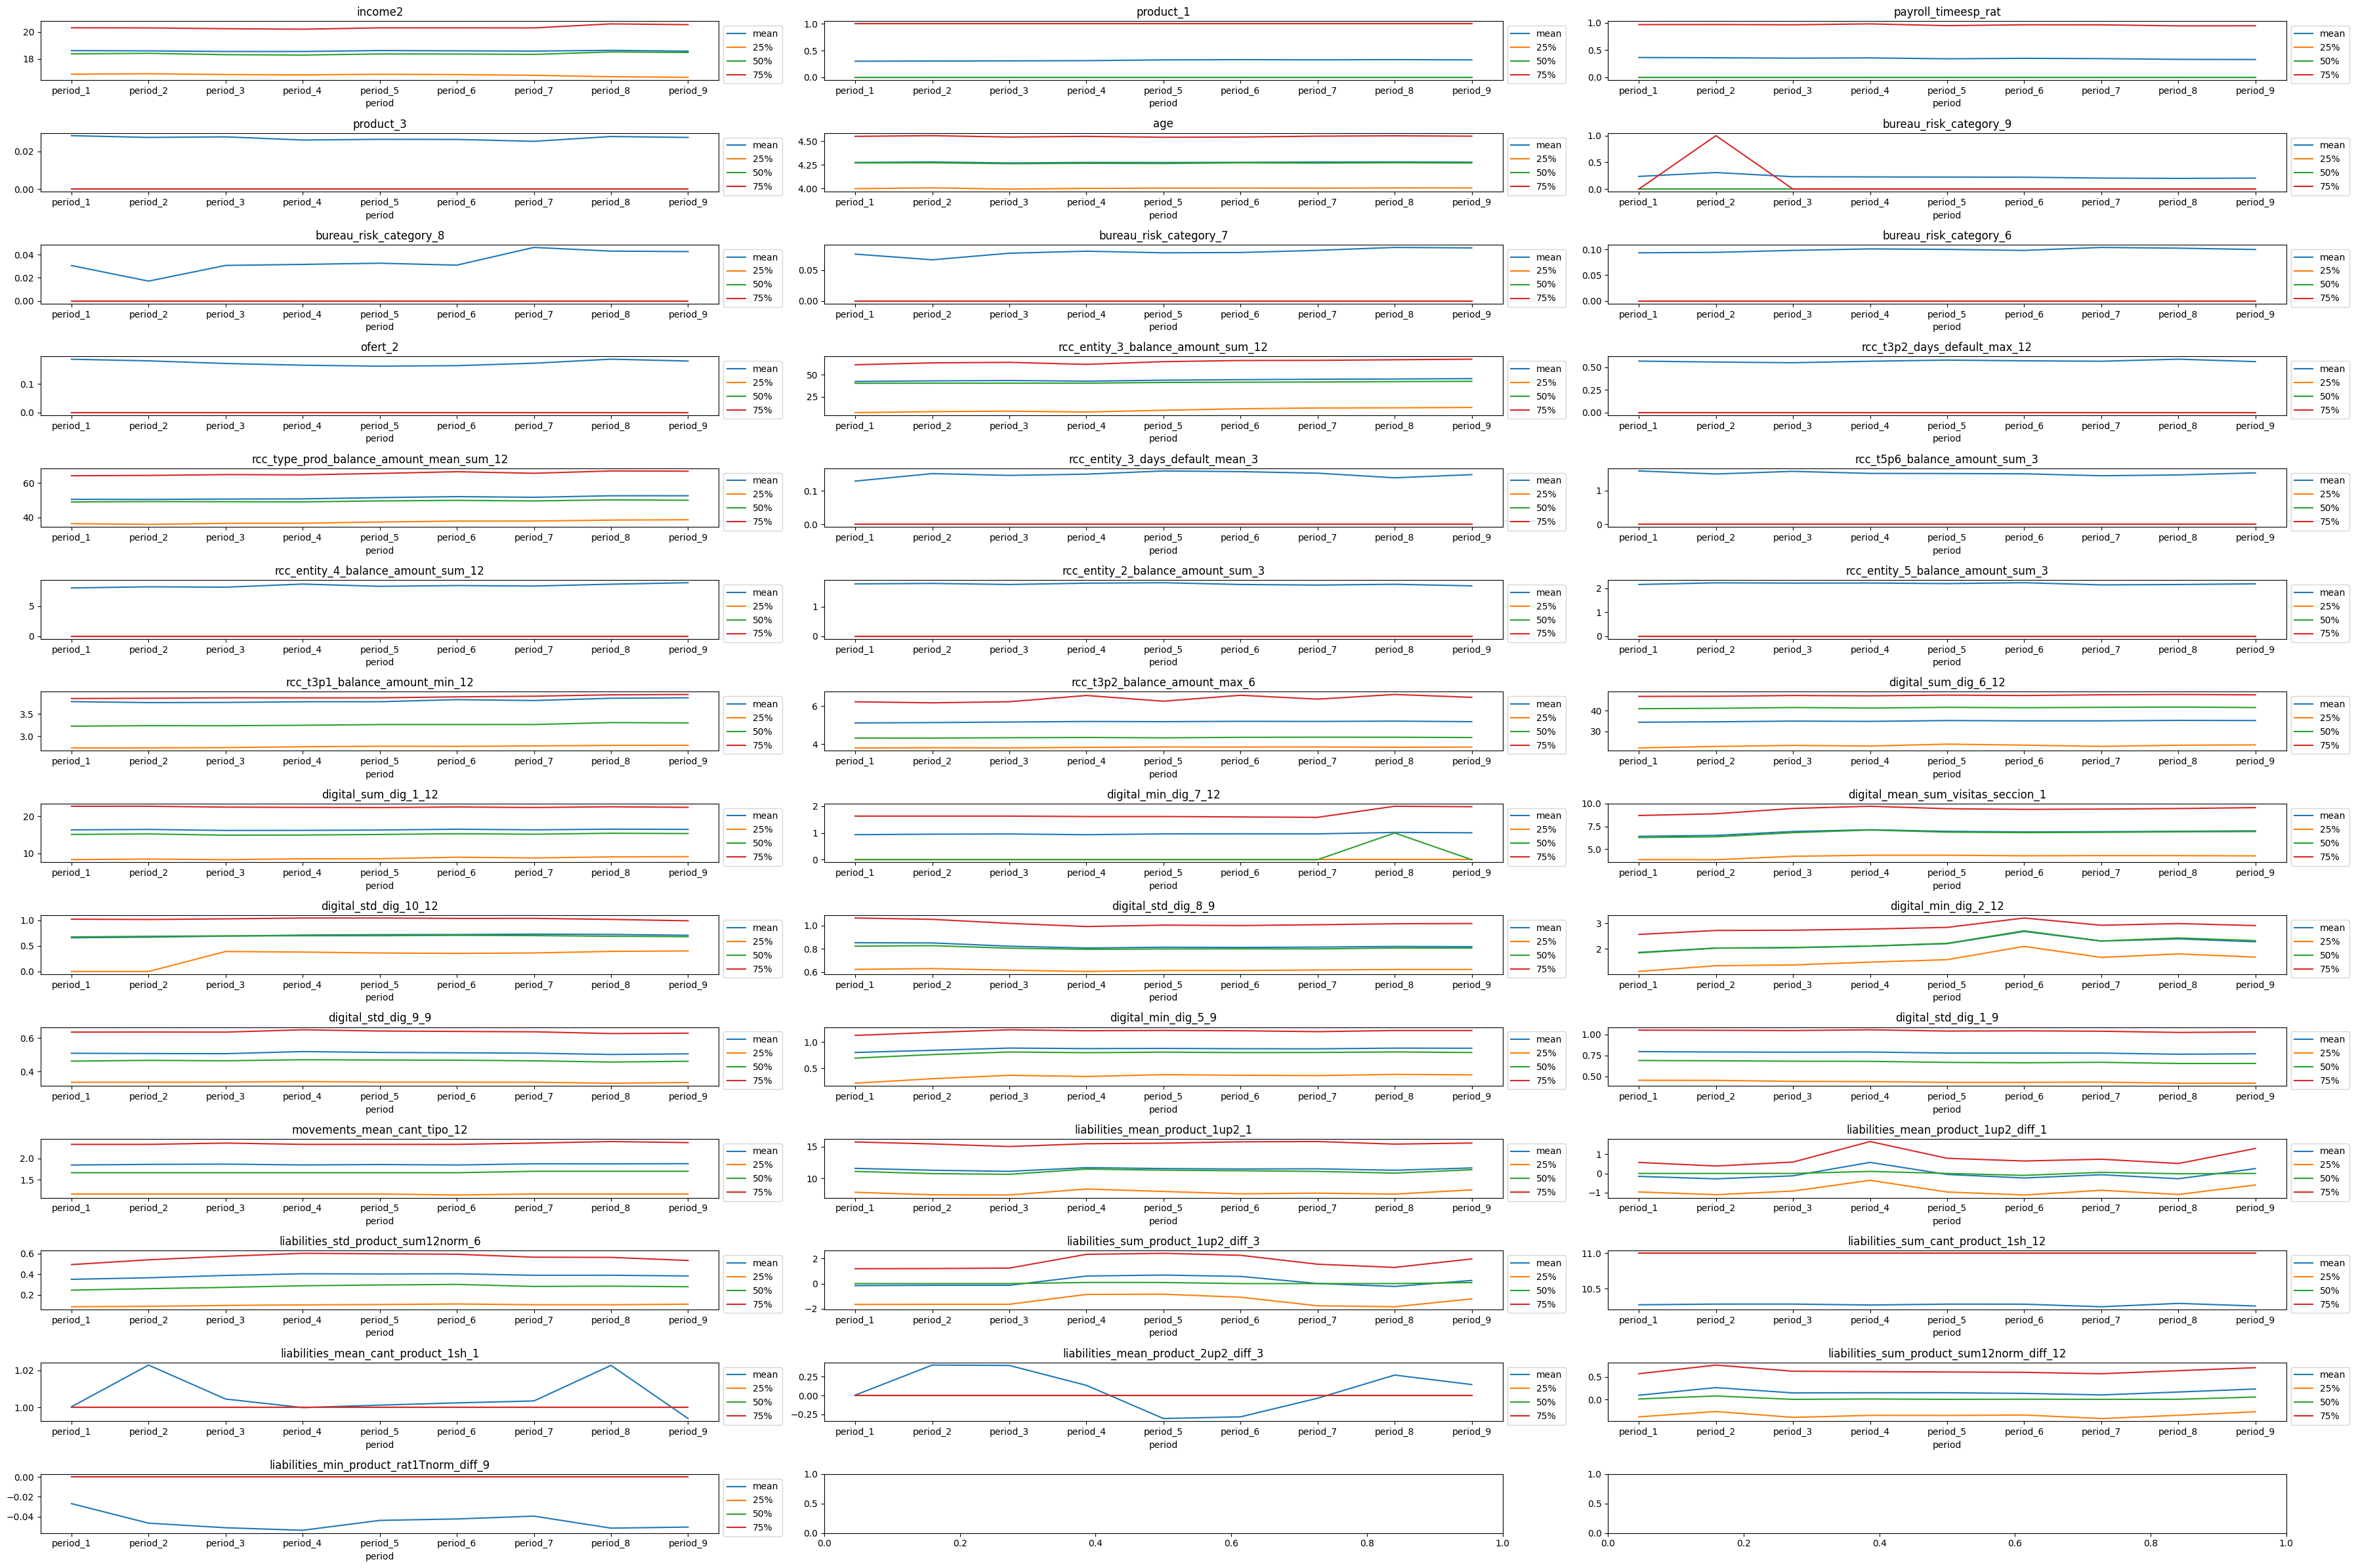

In [44]:
import matplotlib.pyplot as plt
selected_features = consolidado.drop(['ID','attrition','period'], axis=1).columns
col_cont = selected_features #[0:-1]
NN = len(col_cont)
nn = int(np.ceil(NN/3))
print(nn, NN)
fig, ax = plt.subplots(nn,3,    figsize = (36*1., 24*1.)  )

for JJ,  c in enumerate(col_cont):
    JJ = JJ 
    j1, j2 = JJ//3, JJ%3
    #print(j1,j2,c)
    dz = consolidado.groupby('period')[c].describe()
    colplot= [ 'mean', '25%', '50%', '75%']
    dz[colplot].plot(ax = ax[j1][j2], title = c)

    ax[j1][j2].legend(loc='lower left')
    ax[j1][j2].legend(bbox_to_anchor=(1.0, 1.0)) 

    
plt.tight_layout()
plt.savefig('bbva_var.pdf')

In [46]:
%%time
ii = consolidado.attrition == -1

columnas_eliminar = ['ID', 'attrition', 'period']
colsfeat = list(consolidado.columns[~consolidado.columns.isin(columnas_eliminar)])

X = consolidado.loc[ ~ii, ['period'] + colsfeat].copy()
y = consolidado.loc[ ~ii, 'attrition'].copy()


ii = X.period.isin(['period_1', 'period_2', 'period_3', 'period_4'])
X_train, y_train, y_trainM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_5'])
X_test, y_test, y_testM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

ii = X.period.isin(['period_6'])
X_oot, y_oot, y_ootM = X.loc[ii, colsfeat].copy(), y.loc[ii].copy(), y.loc[ii].copy()

X_train.head()

CPU times: user 172 ms, sys: 13.5 ms, total: 186 ms
Wall time: 185 ms


,income2,product_1,payroll_timeesp_rat,product_3,age,bureau_risk_category_9,bureau_risk_category_8,bureau_risk_category_7,bureau_risk_category_6,ofert_2,...,movements_mean_cant_tipo_12,liabilities_mean_product_1up2_1,liabilities_mean_product_1up2_diff_1,liabilities_std_product_sum12norm_6,liabilities_sum_product_1up2_diff_3,liabilities_sum_cant_product_1sh_12,liabilities_mean_cant_product_1sh_1,liabilities_mean_product_2up2_diff_3,liabilities_sum_product_sum12norm_diff_12,liabilities_min_product_rat1Tnorm_diff_9
0,18.929461,0,NaN,0,4.3896,0,0,0,0,0,...,NaN,22.602418,0.000951,0.020357,0.130077,11.0,1.0,0.0,0.0630,0.0
1,19.530212,0,NaN,0,4.2603,0,0,0,0,1,...,1.750000,16.544556,-0.379617,0.193375,-2.901780,11.0,1.0,0.0,0.4913,0.0
2,18.192784,0,NaN,0,4.4572,1,0,0,0,0,...,NaN,14.588580,0.033592,0.053247,0.481044,11.0,1.0,0.0,0.6581,0.0
4,19.718928,1,0.0,0,3.9056,0,0,0,0,1,...,3.166667,19.941583,5.199055,0.294296,5.874583,11.0,1.0,0.0,1.3386,0.0
6,17.584604,1,NaN,0,4.4216,0,0,0,0,0,...,2.000000,10.847142,0.289192,0.068358,-0.528638,9.0,1.0,0.0,1.8788,0.0


# **Calculando PSI**

In [47]:
REF = []
for c in selected_features:
    bins = X_train[c].quantile([0, .25, .5, .75, 1])

    if bins.nunique()==5:

        labels = ['Q1', 'Q2', 'Q3', 'Q4']

        ref = pd.cut( X_train[c] , bins = [-np.inf]+  list(bins.values[1:-1]) + [np.inf] , labels = labels )
        ref = pd.DataFrame(ref.value_counts(1)).reset_index()
        ref.columns = ['label', 'ratio']
        ref['name'] = c
    REF.append(ref)
REF = pd.concat(REF).drop_duplicates()
REF

,label,ratio,name
0,Q1,0.250196,income2
1,Q3,0.249991,income2
2,Q4,0.249957,income2
3,Q2,0.249855,income2
0,Q3,0.250071,age
...,...,...,...
3,Q3,0.187961,liabilities_sum_product_1up2_diff_3
0,Q1,0.250006,liabilities_sum_product_sum12norm_diff_12
1,Q4,0.250006,liabilities_sum_product_sum12norm_diff_12
2,Q2,0.249994,liabilities_sum_product_sum12norm_diff_12


In [48]:
PSIMES = []
for c in selected_features:
    bins = X_train[c].quantile([0, .25, .5, .75, 1])
    #print(bins)
    if bins.nunique()==5:
        PSI = consolidado[['period']].copy()
        labels = ['Q1', 'Q2', 'Q3', 'Q4']
        #bins =  REF[REF['name'] == c].sort_values('label')
        PSI[c] = pd.cut( consolidado[c] , bins =  [-np.inf]+  list(bins.values[1:-1]) + [np.inf], labels = labels )
        #ii = PSI[c].isin(labels)
        #PSI.loc[~ii, c] = 'Q1'
        z = PSI.value_counts(['period', c]).unstack()
        #print(z)
        zr = (z/z.sum(axis = 1).values.reshape(-1,1))
        x = REF[REF['name'] == c].sort_values('label').ratio.values
        y = zr
        psi = ((y-x)*np.log(y/x)).sum(axis = 1)
        psi = pd.DataFrame(psi)
        psi['name'] = c
        PSIMES.append(psi)
PSIMES = pd.concat(PSIMES)
PSIMES

,0,name
period,,
period_1,0.000128,income2
period_2,0.000535,income2
period_3,0.000163,income2
period_4,0.000337,income2
period_5,0.000086,income2
...,...,...
period_5,0.000931,liabilities_sum_product_sum12norm_diff_12
period_6,0.001001,liabilities_sum_product_sum12norm_diff_12
period_7,0.003291,liabilities_sum_product_sum12norm_diff_12


In [49]:
PSIMES[PSIMES[0]>=0.2]['name']

period
period_6    digital_min_dig_2_12
Name: name, dtype: object

In [50]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=[0,1,2,3,4,5], y=y_train)
#lgb_train = lgb.Dataset(X_train, y_train, weight=class_weights[y_train])
class_weights#[y_train]

array([ 0.19164752,  1.93674977, 15.50422386, 26.12544484, 13.335604  ,
       11.36416409])

In [51]:
!pip install lightgbm==3.3.2  
import lightgbm as lgb  #  lightgbm==3.3.2   sagemaker'4.1.0'
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
lgb.__version__

'3.3.2'

# **Algortimo**

In [52]:
%%time
train_data_lgb = lgb.Dataset(X_train, label=y_train, weight=class_weights[y_train])
test_data_lgb = lgb.Dataset(X_test, label=y_test)

param = {
    'objective': 'multiclass',
    'boosting': 'gbdt',
    'metric': 'multi_logloss',
    ##'metric': 'multi_error',
    'task': 'train',
    'num_class': 9,
    "max_depth":9,
    "num_leaves":32,
    'learning_rate': 0.01,
    "min_child_samples": 100,
    'feature_fraction': 0.9,
    "bagging_freq":1,
    'bagging_fraction': 0.9,
    "lambda_l1":1,
    "lambda_l2":1,
    # "scale_pos_weight":30,
    'verbosity': -1,
    'is_unbalance': True,
    'num_boost_round': 3000
}


# model = lgb.train(param,
#     train_data_lgb,
#     valid_sets=test_data_lgb,
#     num_boost_round=1800,
#     early_stopping_rounds=100,
# )
model = lgb.train(
param,
train_data_lgb,
valid_sets=[test_data_lgb, train_data_lgb], 
verbose_eval=100,
early_stopping_rounds=500, 
)


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 500 rounds
[100]	training's multi_logloss: 1.03263	valid_0's multi_logloss: 1.31529
[200]	training's multi_logloss: 0.81997	valid_0's multi_logloss: 1.20644
[300]	training's multi_logloss: 0.706754	valid_0's multi_logloss: 1.15107
[400]	training's multi_logloss: 0.628522	valid_0's multi_logloss: 1.10733
[500]	training's multi_logloss: 0.567976	valid_0's multi_logloss: 1.06967
[600]	training's multi_logloss: 0.518744	valid_0's multi_logloss: 1.03629
[700]	training's multi_logloss: 0.477422	valid_0's multi_logloss: 1.0056
[800]	training's multi_logloss: 0.442326	valid_0's multi_logloss: 0.976043
[900]	training's multi_logloss: 0.41219	valid_0's multi_logloss: 0.949852
[1000]	training's multi_logloss: 0.385524	valid_0's multi_logloss: 0.924659
[1100]	training's multi_logloss: 0.362148	valid_0's multi_logloss: 0.901766
[1200]	training's multi_logloss: 0.341537	valid_0's multi_logloss: 0.880662
[1300]	training's multi_logloss: 0.322733	vali

In [53]:
fi =pd.DataFrame(zip( model.feature_name(), model.feature_importance(importance_type='gain'))).sort_values(1,ascending = False)
fi.columns = ['variable', 'gain']

fi = fi.sort_values('gain', ascending = False)
fi['cumsum'] = fi.gain.cumsum()/fi.gain.sum()
fi['gain_porcentaje'] = (fi.gain/fi.gain.sum()*100).round(3)
colliab = list(fi[fi['cumsum']<.95].variable )
print(len(colliab), fi.shape)
print(colliab)
fi.head(50)

28 (40, 4)
['liabilities_mean_product_1up2_1', 'rcc_entity_3_balance_amount_sum_12', 'rcc_entity_3_days_default_mean_3', 'liabilities_mean_product_1up2_diff_1', 'product_1', 'digital_mean_sum_visitas_seccion_1', 'liabilities_std_product_sum12norm_6', 'income2', 'liabilities_sum_product_1up2_diff_3', 'rcc_t3p1_balance_amount_min_12', 'age', 'rcc_t3p2_balance_amount_max_6', 'liabilities_sum_product_sum12norm_diff_12', 'digital_sum_dig_1_12', 'movements_mean_cant_tipo_12', 'digital_std_dig_1_9', 'digital_min_dig_2_12', 'rcc_type_prod_balance_amount_mean_sum_12', 'digital_std_dig_10_12', 'digital_sum_dig_6_12', 'digital_std_dig_9_9', 'digital_min_dig_5_9', 'digital_std_dig_8_9', 'liabilities_mean_product_2up2_diff_3', 'rcc_t3p2_days_default_max_12', 'liabilities_min_product_rat1Tnorm_diff_9', 'liabilities_sum_cant_product_1sh_12', 'rcc_entity_5_balance_amount_sum_3']


,variable,gain,cumsum,gain_porcentaje
31,liabilities_mean_product_1up2_1,2.055977e+06,0.150253,15.025
10,rcc_entity_3_balance_amount_sum_12,1.021531e+06,0.224907,7.465
13,rcc_entity_3_days_default_mean_3,9.632742e+05,0.295304,7.040
32,liabilities_mean_product_1up2_diff_1,8.038763e+05,0.354053,5.875
1,product_1,7.592763e+05,0.409541,5.549
23,digital_mean_sum_visitas_seccion_1,7.510408e+05,0.464428,5.489
33,liabilities_std_product_sum12norm_6,5.701279e+05,0.506094,4.167
0,income2,4.628905e+05,0.539922,3.383
34,liabilities_sum_product_1up2_diff_3,4.127070e+05,0.570083,3.016
18,rcc_t3p1_balance_amount_min_12,4.024988e+05,0.599498,2.942


In [54]:
liab_col = [c for c in fi.variable if 'liabilities_' in c]
rcc_col = [c for c in fi.variable if 'rcc_' in c]
dig_col = [c for c in fi.variable if 'dig_' in c]
mov_col = [c for c in fi.variable if 'movements_' in c]
cust_col = [c for c in fi.variable if  c not in liab_col + rcc_col +dig_col + mov_col]

dictfuente = {   'liabilities': liab_col ,
              'rcc' :rcc_col ,
               'digital': dig_col , 
               'movements':mov_col,
               'customers':cust_col}
for name in dictfuente:
    #print(fi[fi.variable.isin(columnas)].gain_porcentaje.sum(), len(columnas))
    ii = fi.variable.isin(dictfuente[name])
    fi.loc[ii, 'fuente'] = name
    #print(name)
fi.groupby('fuente').gain_porcentaje.sum().sort_values()

fuente
movements       2.269
digital        17.030
customers      20.623
rcc            25.994
liabilities    34.088
Name: gain_porcentaje, dtype: float64

In [55]:
fi.groupby('fuente').gain_porcentaje.count().sort_values()

fuente
movements       1
digital         9
liabilities     9
rcc            10
customers      11
Name: gain_porcentaje, dtype: int64

In [56]:
fi.variable.str.split('_')

31                [liabilities, mean, product, 1up2, 1]
10           [rcc, entity, 3, balance, amount, sum, 12]
13             [rcc, entity, 3, days, default, mean, 3]
32          [liabilities, mean, product, 1up2, diff, 1]
1                                          [product, 1]
23            [digital, mean, sum, visitas, seccion, 1]
33            [liabilities, std, product, sum12norm, 6]
0                                             [income2]
34           [liabilities, sum, product, 1up2, diff, 3]
18                [rcc, t3p1, balance, amount, min, 12]
4                                                 [age]
19                 [rcc, t3p2, balance, amount, max, 6]
38     [liabilities, sum, product, sum12norm, diff, 12]
21                           [digital, sum, dig, 1, 12]
30                    [movements, mean, cant, tipo, 12]
29                            [digital, std, dig, 1, 9]
26                           [digital, min, dig, 2, 12]
12    [rcc, type, prod, balance, amount, mean, s

In [57]:
%%time

from sklearn.metrics import f1_score, roc_auc_score
print(X_test.shape, X_train.shape) 


prediccion_lgb_test = model.predict(X_test, num_iteration=model.best_iteration)
prediccion_lgb_oot = model.predict(X_oot, num_iteration=model.best_iteration)

print('test ', f1_score(y_test, np.argmax(prediccion_lgb_test, axis=1), average='macro'))
print('oot ', f1_score(y_oot, np.argmax(prediccion_lgb_oot, axis=1), average='macro'))



(23147, 40) (88095, 40)
test  0.34751700693927345
oot  0.3259502027027252
CPU times: user 4min 42s, sys: 0 ns, total: 4min 42s
Wall time: 1min 12s


In [58]:
%%time
!free -h

yprob_test = pd.DataFrame(prediccion_lgb_test)
yprob_test['clase'] = np.argmax(prediccion_lgb_test, axis=1)
yprob_test['target'] = y_test.values

yprob_oot = pd.DataFrame(prediccion_lgb_oot)
yprob_oot['clase'] = np.argmax(prediccion_lgb_oot, axis=1)
yprob_oot['target'] = y_oot.values

print('test ', f1_score(yprob_test['target'],yprob_test['clase'], average='macro'))
print('oot ', f1_score(yprob_oot['target'],yprob_oot['clase'], average='macro'))

yprob_test.head()

              total        used        free      shared  buff/cache   available
Mem:           31Gi       7.7Gi        16Gi       0.0Ki       6.8Gi        23Gi
Swap:            0B          0B          0B
test  0.34751700693927345
oot  0.3259502027027252
CPU times: user 92.9 ms, sys: 0 ns, total: 92.9 ms
Wall time: 1.24 s


,0,1,2,3,4,5,6,7,8,clase,target
0,0.989334,0.008877,0.000019,0.000005,0.001750,0.000015,9.818847e-17,9.818847e-17,9.818847e-17,0,0
1,0.723663,0.267242,0.000084,0.000052,0.004616,0.004344,6.435066e-16,6.435066e-16,6.435066e-16,0,0
2,0.841915,0.109657,0.000010,0.000007,0.044974,0.003437,6.928289e-16,6.928289e-16,6.928289e-16,0,4
3,0.990456,0.009424,0.000003,0.000029,0.000028,0.000059,7.009762e-17,7.009762e-17,7.009762e-17,0,0
4,0.030393,0.002235,0.006315,0.005365,0.000686,0.955007,5.157899e-16,5.157899e-16,5.157899e-16,5,5


In [59]:
def opt_f1score(variables):
    x0, x1, x2, x3, x4 , x5 = variables
    ths = np.array( [ x0, x1, x2, x3, x4 , x5])
    cols = [0,1,2,3,4,5]
    z = np.argmax( yprob_test[cols].values/ths, axis = 1)
    return -f1_score(yprob_test['target'].values, z, average='macro')

opt_f1score([ 0.5 ,0.8 , 0.35 , 0.25 , 0.8   , 0.45 ] )

-0.3539726138847586

In [60]:
%%time
from scipy.optimize import differential_evolution

optimization = differential_evolution(lambda x: opt_f1score( x), 
                                      [(0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9), (0.1, 0.9)],seed = 99)
optimization

CPU times: user 8.23 s, sys: 0 ns, total: 8.23 s
Wall time: 8.23 s


 message: Optimization terminated successfully.
 success: True
     fun: -0.37116498860505526
       x: [ 2.232e-01  6.182e-01  3.193e-01  4.890e-01  8.618e-01
            5.595e-01]
     nit: 7
    nfev: 727

In [61]:
%%time

cols = [0,1,2,3,4,5]
ths = np.array([0.85083151, 0.74590786, 0.18507842, 0.18847615, 0.57043708,
       0.23939373] )
yprob_test['clase_th'] = np.argmax( yprob_test[cols].values/ths, axis = 1)
yprob_oot['clase_th'] = np.argmax( yprob_oot[cols].values/ths, axis = 1)

print('test ', f1_score(yprob_test['target'].values,yprob_test['clase'].values, average='macro'))
print('oot ', f1_score(yprob_oot['target'].values,yprob_oot['clase'].values, average='macro'))

print('test th', f1_score(yprob_test['target'].values,yprob_test['clase_th'].values, average='macro'))
print('oot th', f1_score(yprob_oot['target'].values,yprob_oot['clase_th'].values, average='macro'))
yprob_test.value_counts(['target', 'clase_th']).unstack()

test  0.34751700693927345
oot  0.3259502027027252
test th 0.3191230679763676
oot th 0.3103025428096545
CPU times: user 53 ms, sys: 0 ns, total: 53 ms
Wall time: 50.9 ms


clase_th,0,1,2,3,4,5
target,,,,,,
0,12592,4006,1159,515,444,1245
1,457,1385,16,37,85,35
2,35,7,166,6,7,63
3,54,14,7,43,4,20
4,43,86,37,2,120,8
5,91,25,66,21,3,243


CPU times: user 180 ms, sys: 2.34 ms, total: 183 ms
Wall time: 181 ms


prediccion,0,1,2,3,4,5
period,,,,,,
period_5,57.337884,23.860543,6.268631,2.695814,2.864302,6.972826
period_6,56.278579,24.454801,6.845762,2.532536,2.840310,7.048013


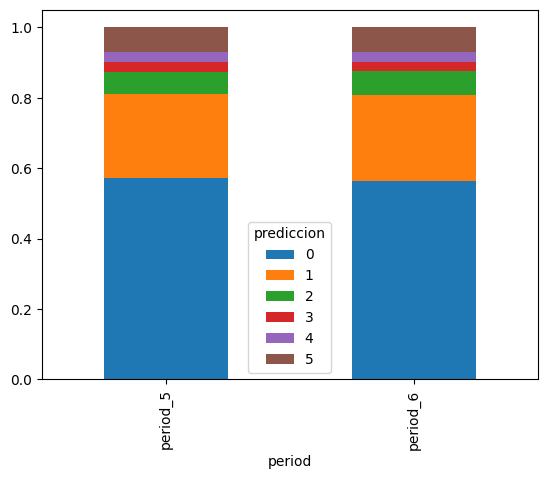

In [62]:
%%time
u1 = pd.DataFrame(yprob_test['clase_th'].values , columns = ['prediccion'])
u1['period']   = 'period_5'

u2 = pd.DataFrame(yprob_oot['clase_th'].values , columns = ['prediccion'])
u2['period']   = 'period_6'
#np.argmax(prediccion_lgb_oot, axis=1)])
u = pd.concat([u1,u2])
z = u.value_counts(['period', 'prediccion']).unstack()
(z/pd.DataFrame(z.sum(axis = 1)).values).plot.bar(stacked = True)
(z/pd.DataFrame(z.sum(axis = 1)).values)*100

attrition,-1,0,1,2,3,4,5
period,,,,,,,
period_1,NaN,87.072439,8.691781,1.054259,0.562272,1.251054,1.368194
period_2,NaN,86.833569,8.721276,1.101010,0.657865,1.215222,1.471059
period_3,NaN,87.059194,8.568730,1.052537,0.629723,1.299928,1.389888
period_4,NaN,86.899081,8.448215,1.091375,0.698127,1.232768,1.630435
period_5,NaN,86.235797,8.705232,1.226941,0.613470,1.278783,1.939776
period_6,NaN,85.297221,9.584945,1.165142,0.663911,1.455329,1.833451
period_7,100.0,NaN,NaN,NaN,NaN,NaN,NaN
period_8,100.0,NaN,NaN,NaN,NaN,NaN,NaN
period_9,100.0,NaN,NaN,NaN,NaN,NaN,NaN


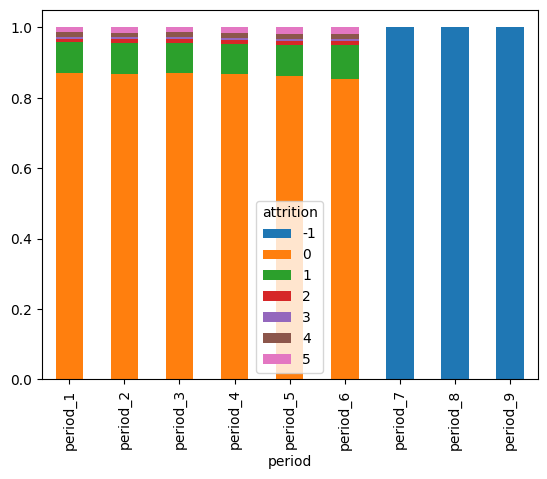

In [63]:
z = consolidado.value_counts(['period', 'attrition']).unstack()
(z/pd.DataFrame(z.sum(axis = 1)).values).plot.bar(stacked = True)
(z/pd.DataFrame(z.sum(axis = 1)).values)*100